In [1]:
import gurobipy

In [2]:
from NashEqFinder import *
from game import *

In [3]:
# --------- Helper Functions ------
def read_matrix(payoff_matrix, SIZE):
    with open(f"../matrices/payoff_matrix_{SIZE}.txt", "r") as f:
        lines = f.readlines()
        for i in range(SIZE):
            for j in range(SIZE):
                payoff_matrix[(('player1', f"S{i+1}"), ('player2', f"S{j+1}"))] = \
                    {'player1': int(lines[i].split()[2*j]), 'player2': int(lines[i].split()[2*j+1])}

# --------- Sample implementation ------
def run_prisoners_dilemma():
    print("\n---- Prisoner's Dilemma ----")
    # Pure strategy Nash eq = (D,D)
    game_name = "Prisoner's Dilemma"
    numberOfPlayers = 2
    players_names = ['player1','player2']
    players_strategies = {}
    players_strategies['player1'] = ['C','D']
    players_strategies['player2'] = ['C','D']
    payoff_matrix = {}
    payoff_matrix[(('player1','C'),('player2','C'))] = {'player1':-1,'player2':-1}
    payoff_matrix[(('player1','C'),('player2','D'))] = {'player1':-4,'player2':0}
    payoff_matrix[(('player1','D'),('player2','C'))] = {'player1':0,'player2':-4}
    payoff_matrix[(('player1','D'),('player2','D'))] = {'player1':-3,'player2':-3}
    # Define an instance of the game
    PD = game(game_name, players_names, players_strategies, payoff_matrix)
    # Define an instance of the NashEqFinder
    NashEqFinderInst = NashEqFinder(PD, stdout_msgs=False, stdout_timing=False)
    [Nash_equilibria, exit_flag, game_payoff_matrix] = NashEqFinderInst.optlangRun()
    show_matrix_original(game_payoff_matrix, game_payoff_matrix, Nash_equilibria, players_strategies['player1'], "Original Payoff Matrix", [])
    # Format the Nash equilibria to be a list of tuples
    original_nasheq_cells = [(cell[0], cell[1]) for cell in Nash_equilibria]
    print("Original Nash equilibria:", original_nasheq_cells)
    NashEqFinderInst.newEquilibria(nasheq_cells=[(('player1','C'), ('player2','C'))],
                                   strategies=['C', 'D'],
                                   original_nasheq_cells=original_nasheq_cells)
    # Find the new equilibria
    [Nash_equilibria, exit_flag, game_payoff_matrix] = NashEqFinderInst.optlangRun()


def run_snowdrift():
    print ("\n---- Snowdrift's Dilemma ----")
    # Pure strategy Nash eq = [(C,C), (D,D)]
    game_name = "Snowdrift's Dilemma"
    numberOfPlayers = 2
    players_names = ['player1','player2']
    players_strategies = {}
    players_strategies['player1'] = ['C','D']
    players_strategies['player2'] = ['C','D']
    payoff_matrix = {}
    payoff_matrix[(('player1','C'),('player2','C'))] = {'player1':3,'player2':3}
    payoff_matrix[(('player1','C'),('player2','D'))] = {'player1':1,'player2':5}
    payoff_matrix[(('player1','D'),('player2','C'))] = {'player1':5,'player2':1}
    payoff_matrix[(('player1','D'),('player2','D'))] = {'player1':0,'player2':0}
    # Define an instance of the game
    SD = game(game_name, players_names, players_strategies, payoff_matrix)
    # Define an instance of the NashEqFinder
    NashEqFinderInst = NashEqFinder(SD, stdout_msgs=False, stdout_timing=False)
    [Nash_equilibria, exit_flag, game_payoff_matrix] = NashEqFinderInst.optlangRun()
    show_matrix_original(game_payoff_matrix, game_payoff_matrix, Nash_equilibria, players_strategies['player1'], "Original Payoff Matrix", [])
    # Format the Nash equilibria to be a list of tuples
    original_nasheq_cells = [(cell[0], cell[1]) for cell in Nash_equilibria]
    print("Original Nash equilibria:", original_nasheq_cells)
    NashEqFinderInst.newEquilibria(nasheq_cells=[(('player1','C'), ('player2','C'))],
                                   strategies=['C', 'D'],
                                   original_nasheq_cells=original_nasheq_cells)
    # Find the new equilibria
    [Nash_equilibria, exit_flag, game_payoff_matrix] = NashEqFinderInst.optlangRun()

def run_5_by_5():
    """ 5 by 5 """
    SIZE = 5
    game_name = f"{SIZE} strategies"
    players_names = ['player1','player2']
    players_strategies = {}
    strategies = ['S' + str(i) for i in range(1,SIZE+1)]
    players_strategies['player1'] = strategies
    players_strategies['player2'] = strategies
    payoff_matrix = {}
    read_matrix(payoff_matrix, SIZE)
    PD = game(game_name, players_names, players_strategies, payoff_matrix)
    NashEqFinderInst = NashEqFinder(PD, optimization_solver='gurobi', stdout_msgs=False, stdout_timing=False)
    [Nash_equilibria, exit_flag, game_payoff_matrix] = NashEqFinderInst.optlangRun()
    show_matrix_original(game_payoff_matrix, game_payoff_matrix, Nash_equilibria, strategies, "Original Payoff Matrix", [])
    original_nasheq_cells = [(cell[0], cell[1]) for cell in Nash_equilibria]
    print("Original Nash equilibria:", original_nasheq_cells)
    i = 5
    j = 2
    print("original_nasheq_cells:", original_nasheq_cells)
    NashEqFinderInst.newEquilibria(nasheq_cells=[(('player1',f'S{i}'), ('player2',f'S{j}'))],
                                  strategies=strategies,
                                  original_nasheq_cells=original_nasheq_cells)


---- Prisoner's Dilemma ----
Set parameter Username
Academic license - for non-commercial use only - expires 2025-01-23


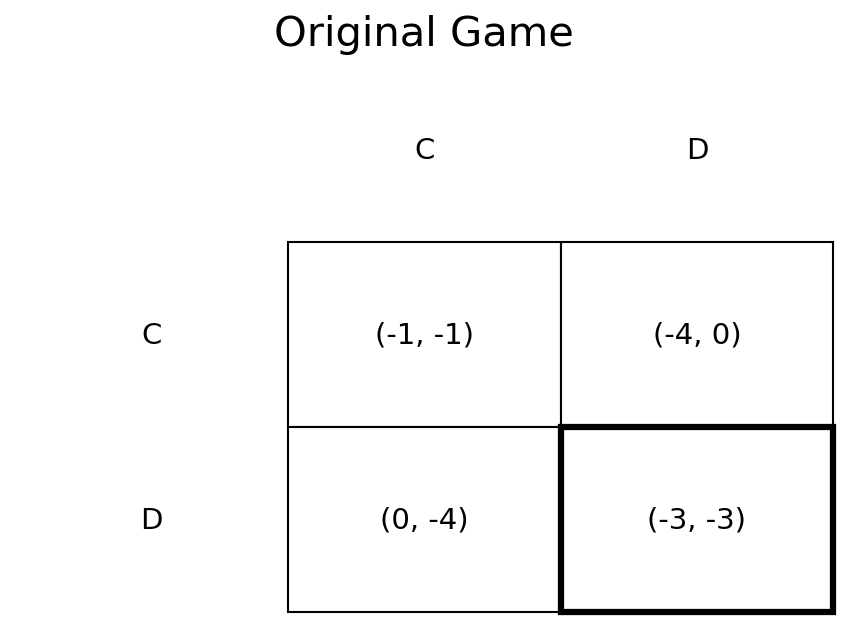

Original Nash equilibria: [(('player1', 'D'), ('player2', 'D'))]



---- Finding Solution 1 ----



Changed cells for first original solution:
Cell: (('player1', 'C'), ('player2', 'D')) | Player: player2 | Sign: minus | Value: 1.01
Cell: (('player1', 'D'), ('player2', 'C')) | Player: player1 | Sign: minus | Value: 1.01
Cell: (('player1', 'D'), ('player2', 'C')) | Player: player2 | Sign: plus | Value: 1.009999999999536

The desired cell(s) [(('player1', 'C'), ('player2', 'C'))] are Nash Equilibria



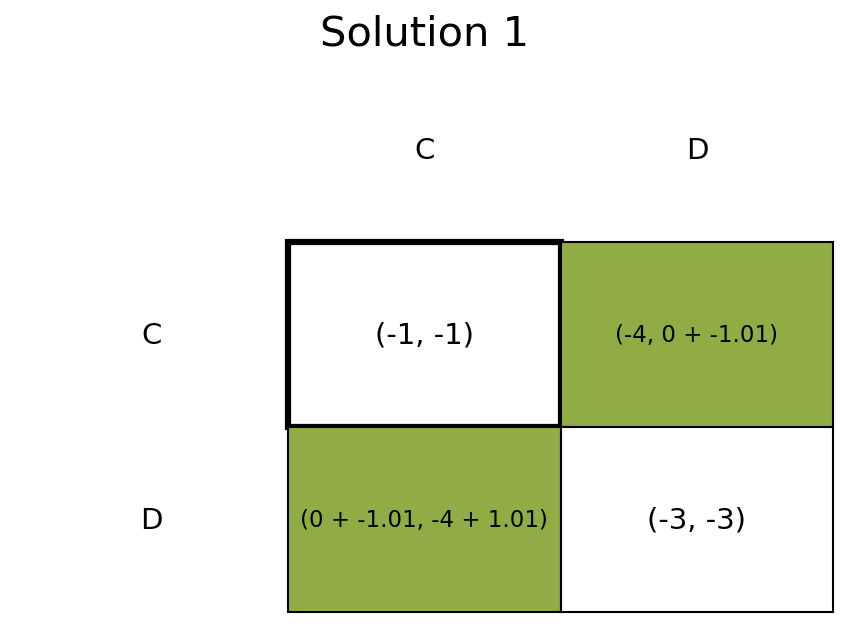




---- Finding Solution 2 ----



Changed cells for solution 2:
Cell: (('player1', 'C'), ('player2', 'C')) | Player: player1 | Sign: plus | Value: 1.01
Cell: (('player1', 'C'), ('player2', 'C')) | Player: player2 | Sign: plus | Value: 1.01
Cell: (('player1', 'D'), ('player2', 'C')) | Player: player2 | Sign: plus | Value: 1.0099999999997635

The desired cell(s) [(('player1', 'C'), ('player2', 'C'))] are Nash Equilibria



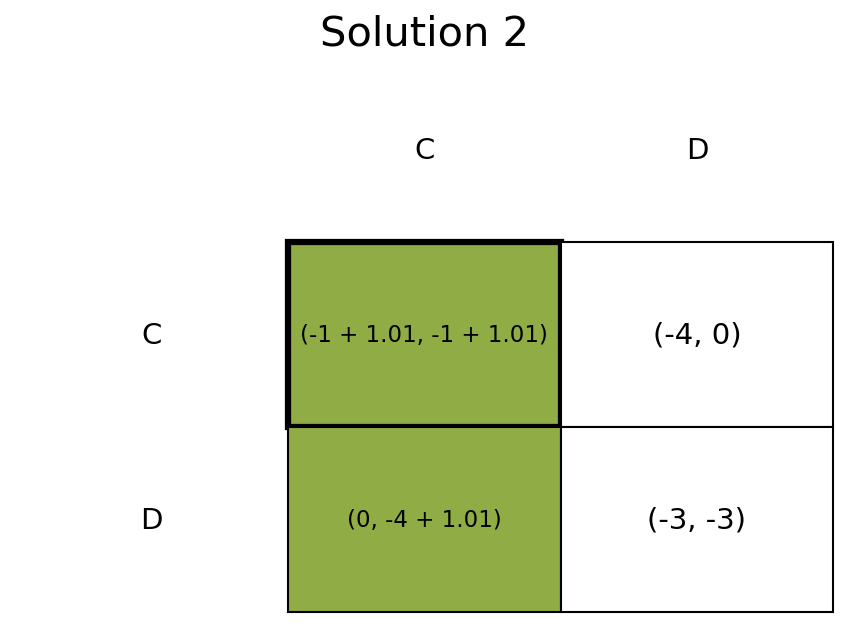




---- Finding Solution 3 ----



Changed cells for solution 3:
Cell: (('player1', 'C'), ('player2', 'C')) | Player: player1 | Sign: plus | Value: 1.01
Cell: (('player1', 'C'), ('player2', 'C')) | Player: player2 | Sign: plus | Value: 1.01
Cell: (('player1', 'C'), ('player2', 'D')) | Player: player1 | Sign: plus | Value: 1.009999999999991

The desired cell(s) [(('player1', 'C'), ('player2', 'C'))] are Nash Equilibria



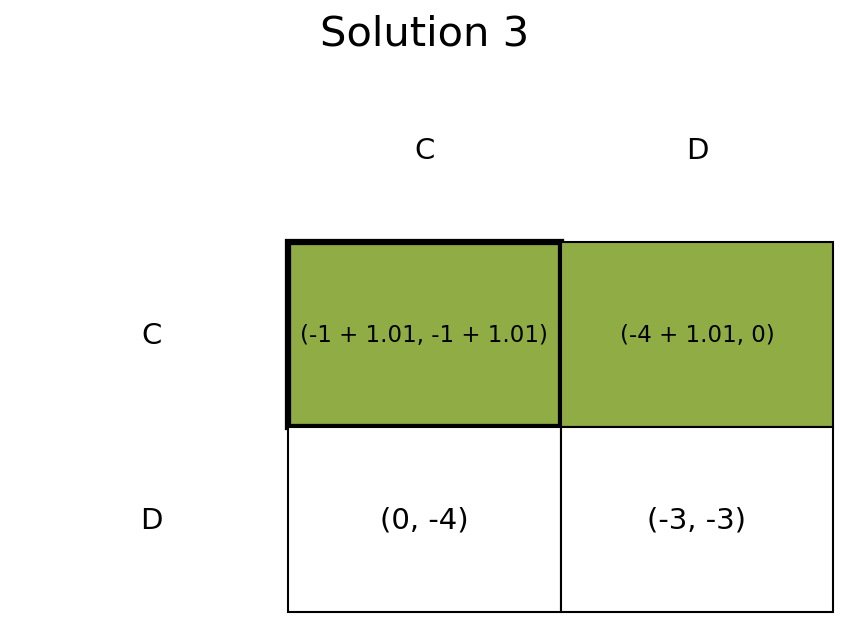




---- Finding Solution 4 ----



Changed cells for solution 4:
Cell: (('player1', 'C'), ('player2', 'D')) | Player: player1 | Sign: plus | Value: 1.009999999999991
Cell: (('player1', 'C'), ('player2', 'D')) | Player: player2 | Sign: minus | Value: 1.01
Cell: (('player1', 'D'), ('player2', 'C')) | Player: player1 | Sign: minus | Value: 1.01

The desired cell(s) [(('player1', 'C'), ('player2', 'C'))] are Nash Equilibria



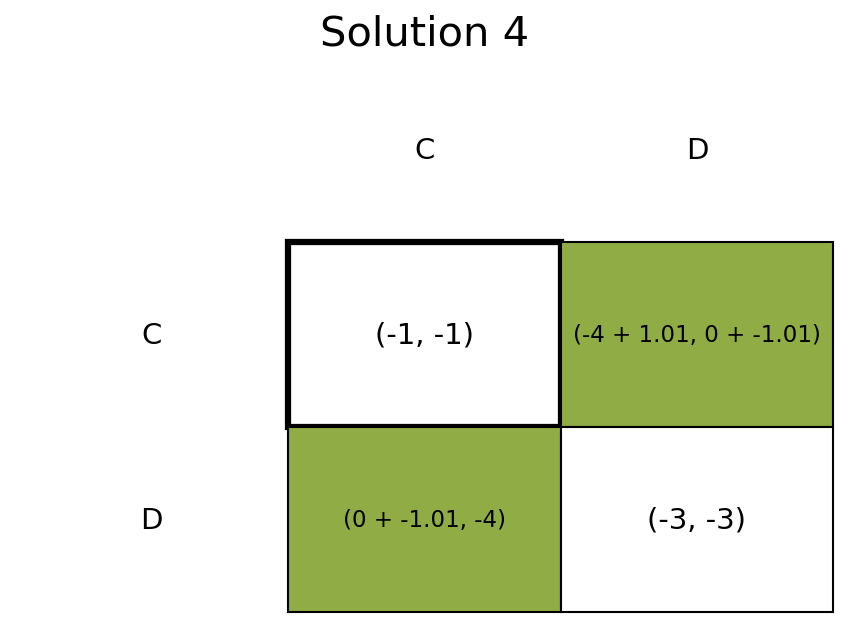




---- Finding Solution 5 ----



Changed cells for solution 5:
Cell: (('player1', 'C'), ('player2', 'C')) | Player: player1 | Sign: plus | Value: 1.01
Cell: (('player1', 'C'), ('player2', 'D')) | Player: player1 | Sign: plus | Value: 1.009999999999991
Cell: (('player1', 'C'), ('player2', 'D')) | Player: player2 | Sign: minus | Value: 1.009999999999991

The desired cell(s) [(('player1', 'C'), ('player2', 'C'))] are Nash Equilibria



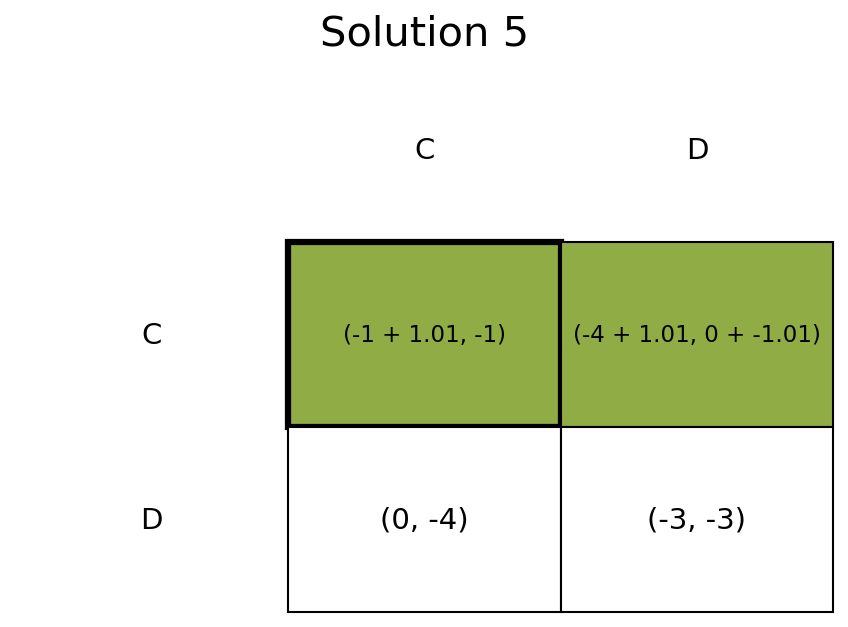




---- Finding Solution 6 ----



Changed cells for solution 6:
Cell: (('player1', 'C'), ('player2', 'C')) | Player: player2 | Sign: plus | Value: 1.01
Cell: (('player1', 'C'), ('player2', 'D')) | Player: player1 | Sign: plus | Value: 1.009999999999991
Cell: (('player1', 'D'), ('player2', 'C')) | Player: player1 | Sign: minus | Value: 1.009999999999991

The desired cell(s) [(('player1', 'C'), ('player2', 'C'))] are Nash Equilibria



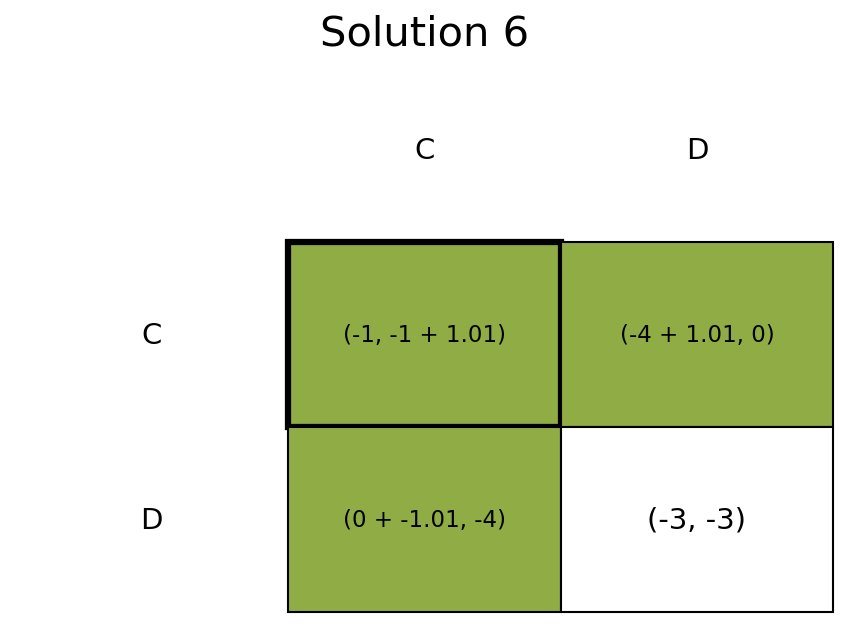




---- Finding Solution 7 ----



Changed cells for solution 7:
Cell: (('player1', 'C'), ('player2', 'C')) | Player: player1 | Sign: plus | Value: 1.01
Cell: (('player1', 'C'), ('player2', 'D')) | Player: player2 | Sign: minus | Value: 1.009999999999991
Cell: (('player1', 'D'), ('player2', 'C')) | Player: player2 | Sign: plus | Value: 1.009999999999991

The desired cell(s) [(('player1', 'C'), ('player2', 'C'))] are Nash Equilibria



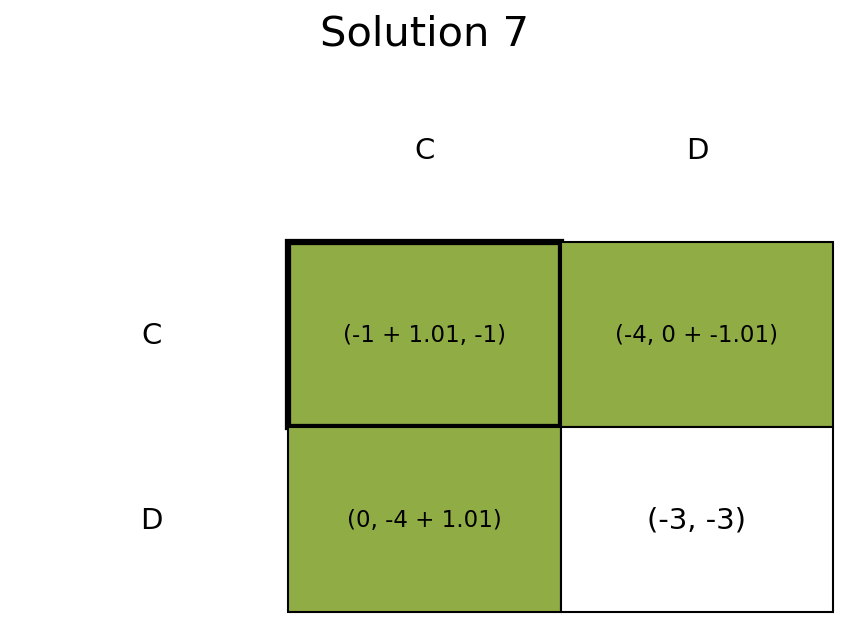




---- Finding Solution 8 ----



Changed cells for solution 8:
Cell: (('player1', 'C'), ('player2', 'C')) | Player: player2 | Sign: plus | Value: 1.01
Cell: (('player1', 'D'), ('player2', 'C')) | Player: player1 | Sign: minus | Value: 1.009999999999991
Cell: (('player1', 'D'), ('player2', 'C')) | Player: player2 | Sign: plus | Value: 1.009999999999991

The desired cell(s) [(('player1', 'C'), ('player2', 'C'))] are Nash Equilibria



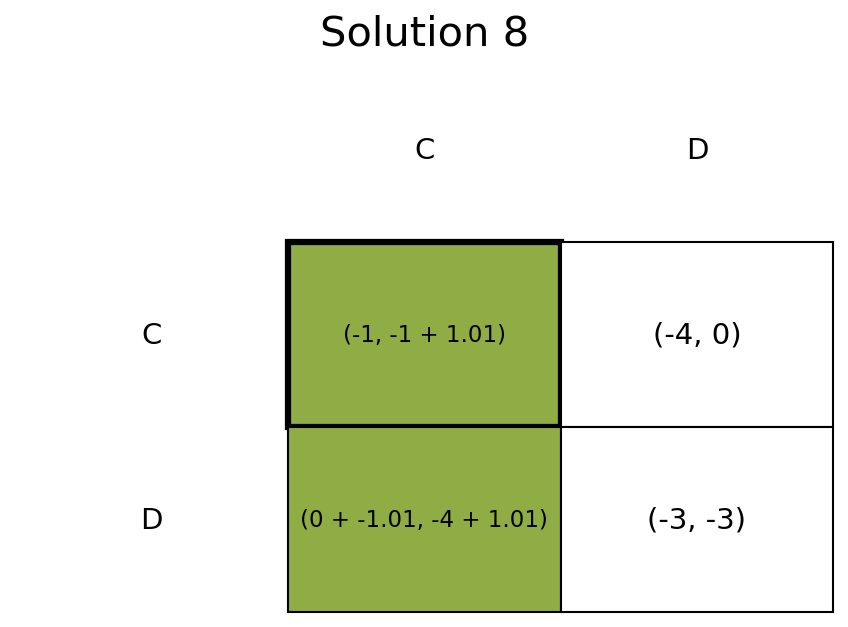




---- Finding Solution 9 ----



The model is infeasible


In [4]:
run_prisoners_dilemma()


---- Snowdrift's Dilemma ----


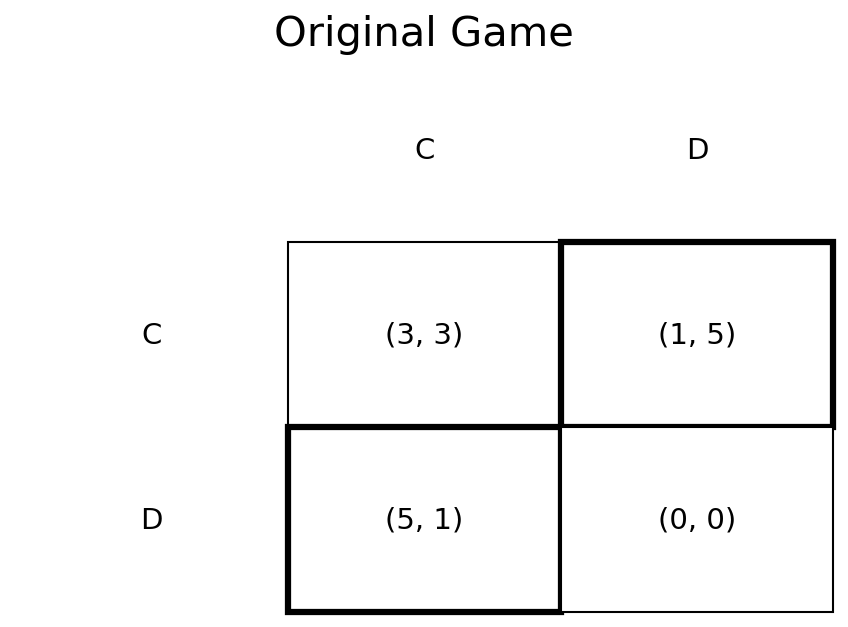

Original Nash equilibria: [(('player1', 'C'), ('player2', 'D')), (('player1', 'D'), ('player2', 'C'))]



---- Finding Solution 1 ----



Changed cells for first original solution:
Cell: (('player1', 'C'), ('player2', 'C')) | Player: player1 | Sign: plus | Value: 2.009999999999999
Cell: (('player1', 'C'), ('player2', 'C')) | Player: player2 | Sign: plus | Value: 2.009999999999999

The desired cell(s) [(('player1', 'C'), ('player2', 'C'))] are Nash Equilibria



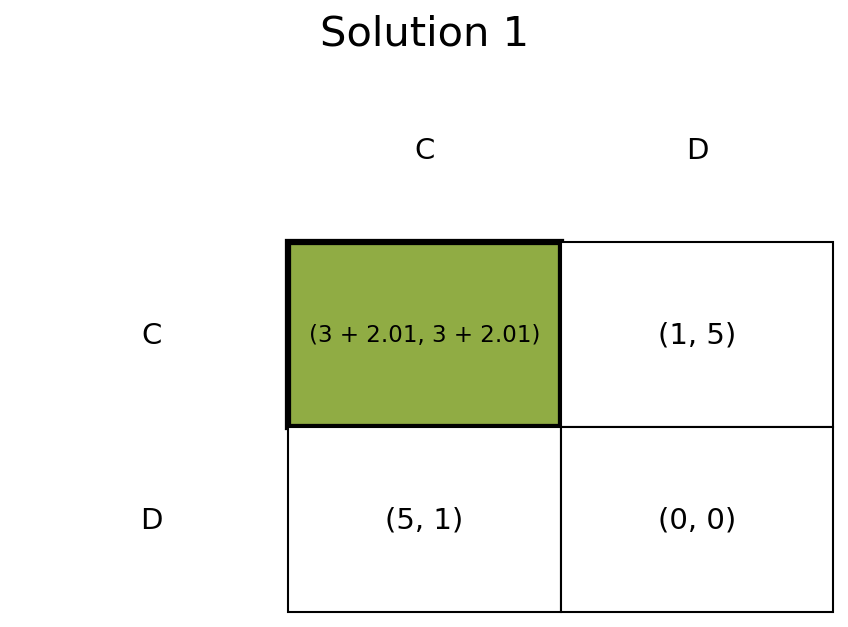




---- Finding Solution 2 ----



The model is infeasible


In [5]:
run_snowdrift()

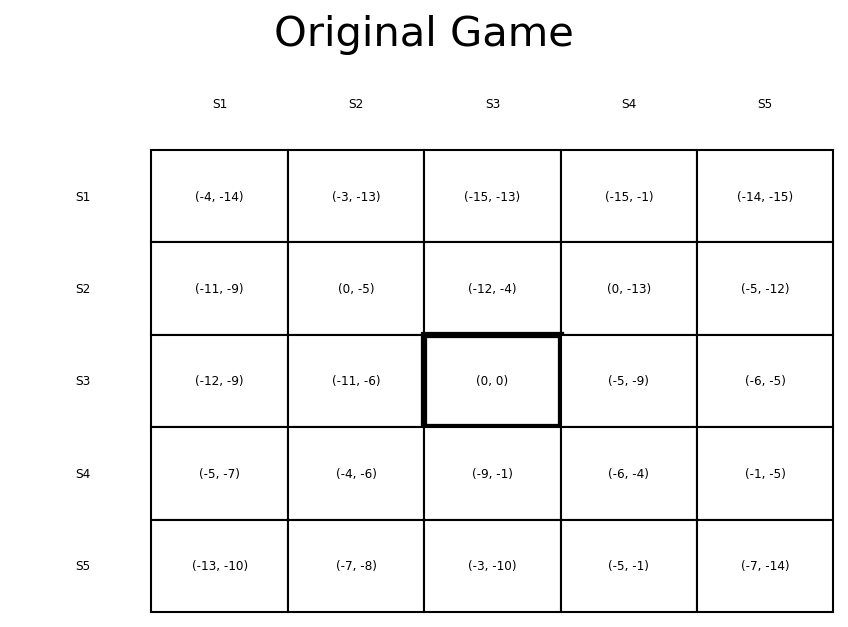

Original Nash equilibria: [(('player1', 'S3'), ('player2', 'S3'))]
original_nasheq_cells: [(('player1', 'S3'), ('player2', 'S3'))]



---- Finding Solution 1 ----



Changed cells for first original solution:
Cell: (('player1', 'S5'), ('player2', 'S2')) | Player: player1 | Sign: plus | Value: 7.01
Cell: (('player1', 'S5'), ('player2', 'S2')) | Player: player2 | Sign: plus | Value: 7.01
Cell: (('player1', 'S5'), ('player2', 'S3')) | Player: player1 | Sign: plus | Value: 3.0099999999987967

The desired cell(s) [(('player1', 'S5'), ('player2', 'S2'))] are Nash Equilibria



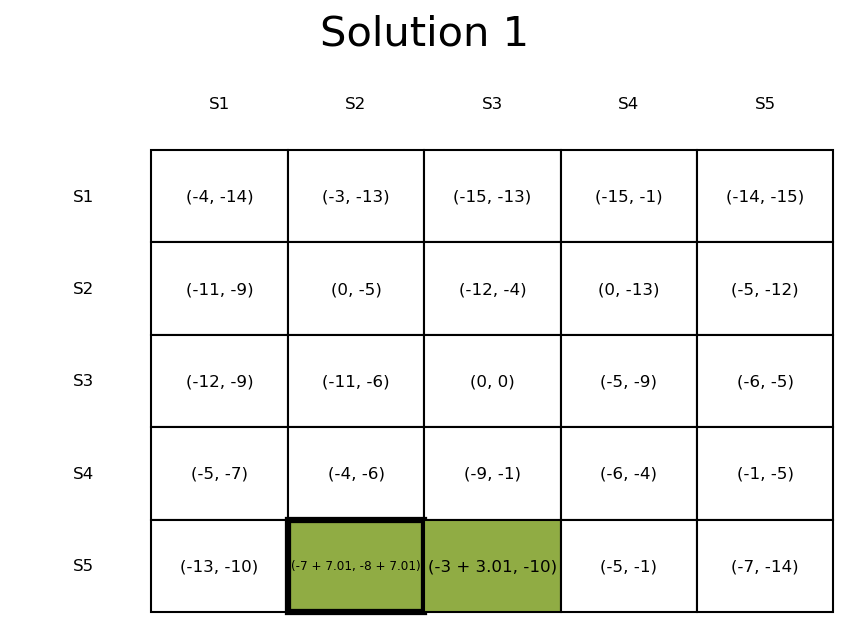




---- Finding Solution 2 ----



Changed cells for solution 2:
Cell: (('player1', 'S2'), ('player2', 'S2')) | Player: player1 | Sign: minus | Value: 3.0
Cell: (('player1', 'S5'), ('player2', 'S2')) | Player: player1 | Sign: plus | Value: 4.01
Cell: (('player1', 'S5'), ('player2', 'S3')) | Player: player1 | Sign: plus | Value: 3.0099999999997635
Cell: (('player1', 'S5'), ('player2', 'S4')) | Player: player2 | Sign: minus | Value: 7.01

The desired cell(s) [(('player1', 'S5'), ('player2', 'S2'))] are Nash Equilibria



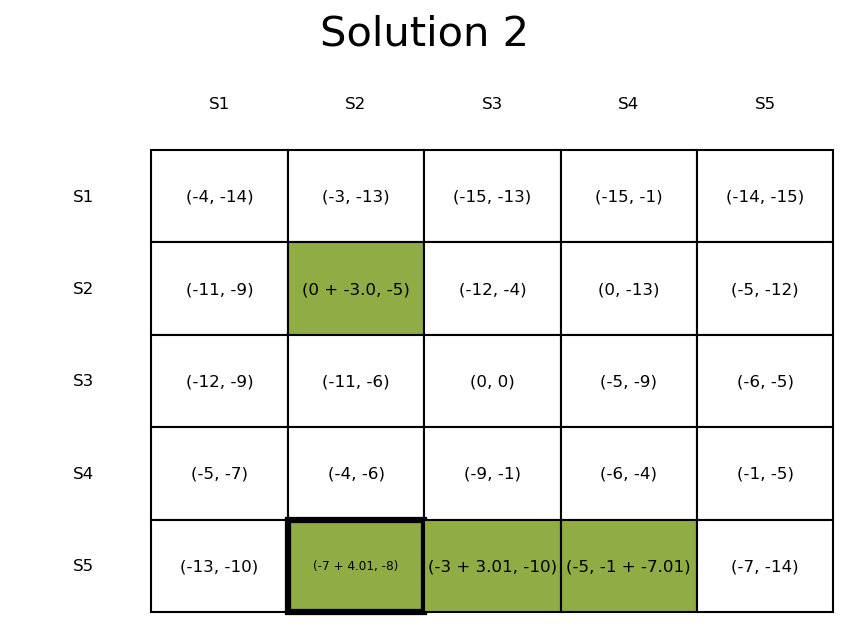




---- Finding Solution 3 ----



Changed cells for solution 3:
Cell: (('player1', 'S5'), ('player2', 'S2')) | Player: player1 | Sign: plus | Value: 7.0099999999999625
Cell: (('player1', 'S5'), ('player2', 'S3')) | Player: player1 | Sign: plus | Value: 3.0099999999986604
Cell: (('player1', 'S5'), ('player2', 'S4')) | Player: player2 | Sign: minus | Value: 7.0099999999999625

The desired cell(s) [(('player1', 'S5'), ('player2', 'S2'))] are Nash Equilibria



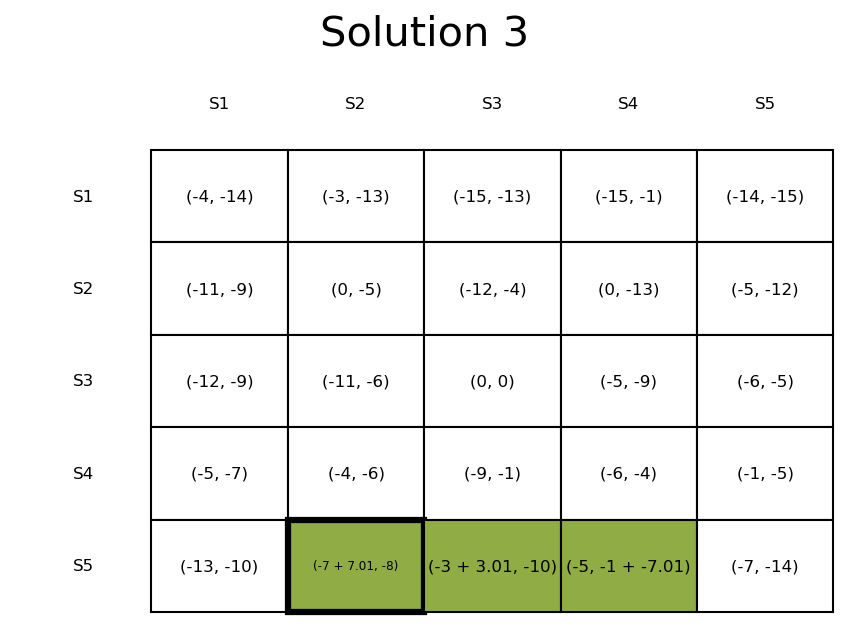




---- Finding Solution 4 ----



Changed cells for solution 4:
Cell: (('player1', 'S2'), ('player2', 'S2')) | Player: player1 | Sign: minus | Value: 0.009999999999990905
Cell: (('player1', 'S3'), ('player2', 'S5')) | Player: player2 | Sign: plus | Value: 5.009999999999583
Cell: (('player1', 'S5'), ('player2', 'S2')) | Player: player1 | Sign: plus | Value: 7.0
Cell: (('player1', 'S5'), ('player2', 'S2')) | Player: player2 | Sign: plus | Value: 7.009999999999948

The desired cell(s) [(('player1', 'S5'), ('player2', 'S2'))] are Nash Equilibria



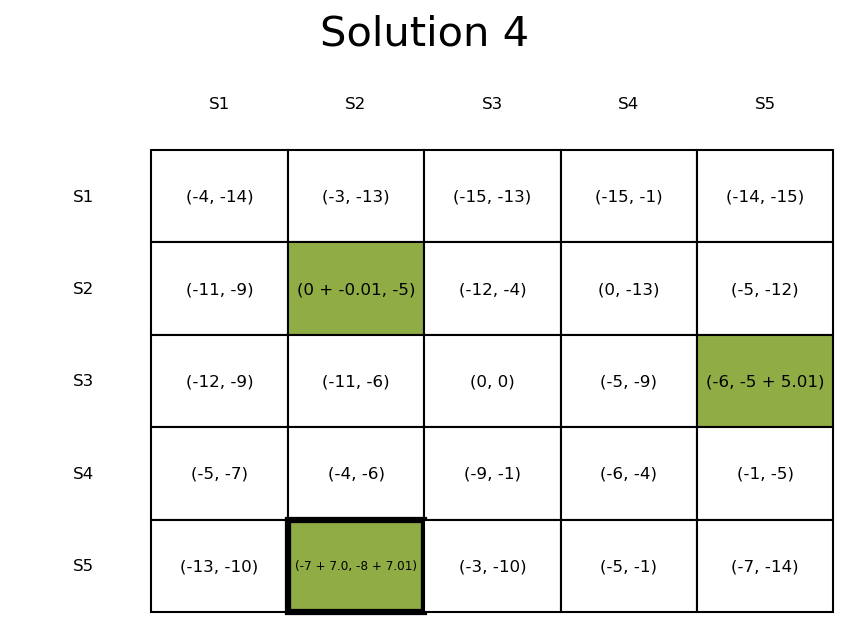




---- Finding Solution 5 ----



Changed cells for solution 5:
Cell: (('player1', 'S2'), ('player2', 'S2')) | Player: player1 | Sign: minus | Value: 3.0
Cell: (('player1', 'S3'), ('player2', 'S5')) | Player: player2 | Sign: plus | Value: 5.00999999999866
Cell: (('player1', 'S5'), ('player2', 'S2')) | Player: player1 | Sign: plus | Value: 4.01
Cell: (('player1', 'S5'), ('player2', 'S4')) | Player: player2 | Sign: minus | Value: 7.01

The desired cell(s) [(('player1', 'S5'), ('player2', 'S2'))] are Nash Equilibria



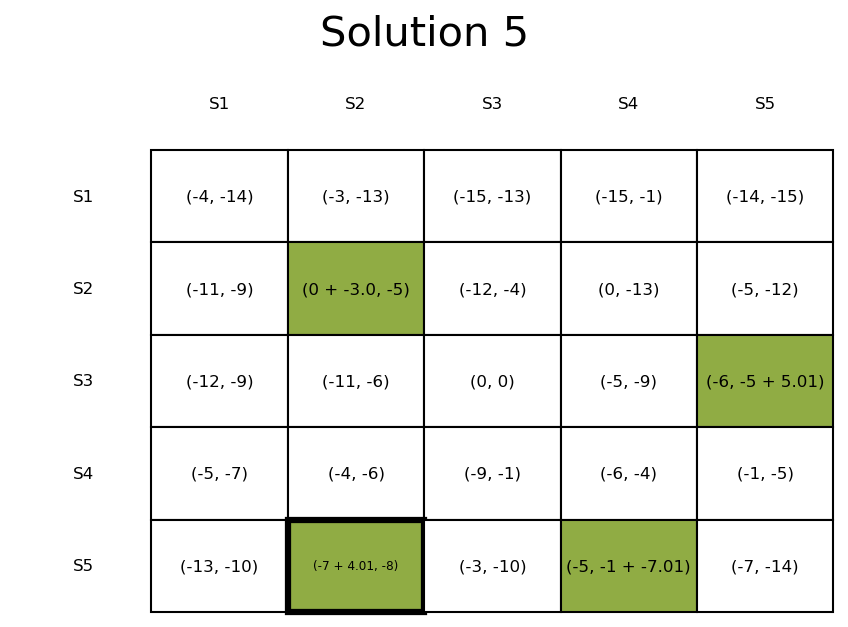




---- Finding Solution 6 ----



Changed cells for solution 6:
Cell: (('player1', 'S3'), ('player2', 'S5')) | Player: player2 | Sign: plus | Value: 5.009999999996166
Cell: (('player1', 'S5'), ('player2', 'S2')) | Player: player1 | Sign: plus | Value: 7.00999999999997
Cell: (('player1', 'S5'), ('player2', 'S2')) | Player: player2 | Sign: plus | Value: 7.009999999999955

The desired cell(s) [(('player1', 'S5'), ('player2', 'S2'))] are Nash Equilibria



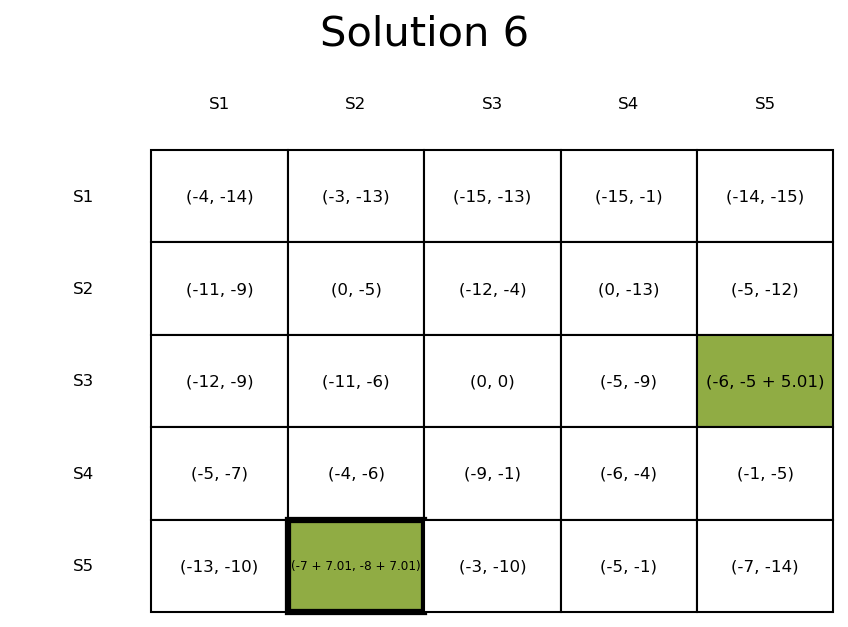




---- Finding Solution 7 ----



Changed cells for solution 7:
Cell: (('player1', 'S3'), ('player2', 'S5')) | Player: player2 | Sign: plus | Value: 5.009999999997069
Cell: (('player1', 'S5'), ('player2', 'S2')) | Player: player1 | Sign: plus | Value: 7.01
Cell: (('player1', 'S5'), ('player2', 'S4')) | Player: player2 | Sign: minus | Value: 7.009999999999991

The desired cell(s) [(('player1', 'S5'), ('player2', 'S2'))] are Nash Equilibria



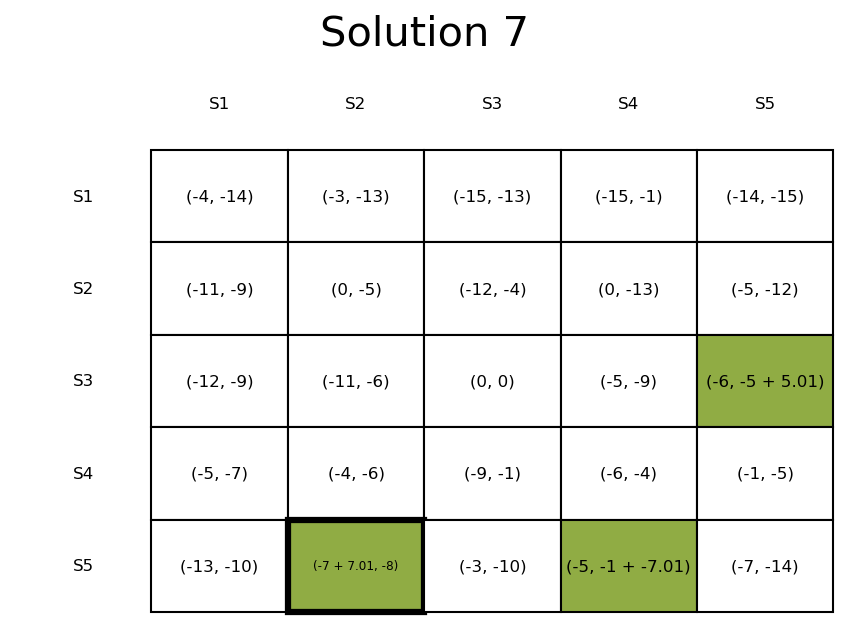




---- Finding Solution 8 ----



Changed cells for solution 8:
Cell: (('player1', 'S2'), ('player2', 'S2')) | Player: player1 | Sign: minus | Value: 3.0
Cell: (('player1', 'S3'), ('player2', 'S2')) | Player: player2 | Sign: plus | Value: 6.009999999999081
Cell: (('player1', 'S5'), ('player2', 'S2')) | Player: player1 | Sign: plus | Value: 4.01
Cell: (('player1', 'S5'), ('player2', 'S4')) | Player: player2 | Sign: minus | Value: 7.01

The desired cell(s) [(('player1', 'S5'), ('player2', 'S2'))] are Nash Equilibria



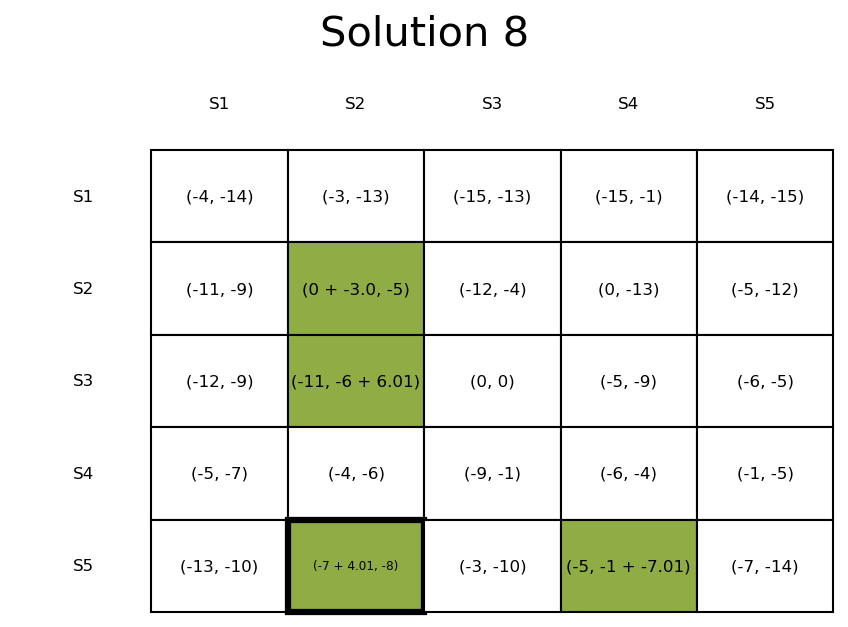




---- Finding Solution 9 ----



Changed cells for solution 9:
Cell: (('player1', 'S3'), ('player2', 'S2')) | Player: player2 | Sign: plus | Value: 6.009999999999534
Cell: (('player1', 'S5'), ('player2', 'S2')) | Player: player1 | Sign: plus | Value: 7.0099999999999625
Cell: (('player1', 'S5'), ('player2', 'S4')) | Player: player2 | Sign: minus | Value: 7.009999999999948

The desired cell(s) [(('player1', 'S5'), ('player2', 'S2'))] are Nash Equilibria



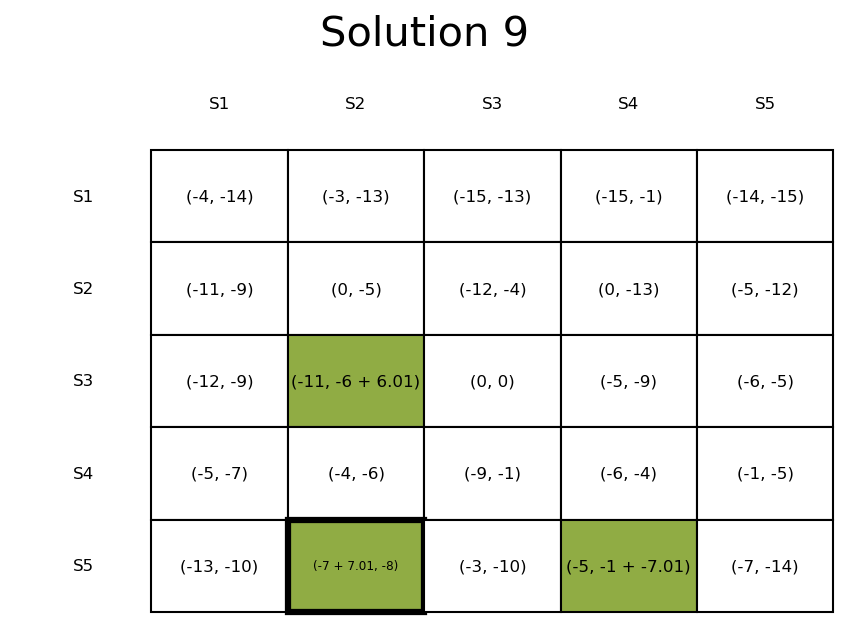




---- Finding Solution 10 ----



Changed cells for solution 10:
Cell: (('player1', 'S3'), ('player2', 'S2')) | Player: player2 | Sign: plus | Value: 6.009999999997024
Cell: (('player1', 'S5'), ('player2', 'S2')) | Player: player1 | Sign: plus | Value: 7.01
Cell: (('player1', 'S5'), ('player2', 'S2')) | Player: player2 | Sign: plus | Value: 7.009999999999998

The desired cell(s) [(('player1', 'S5'), ('player2', 'S2'))] are Nash Equilibria



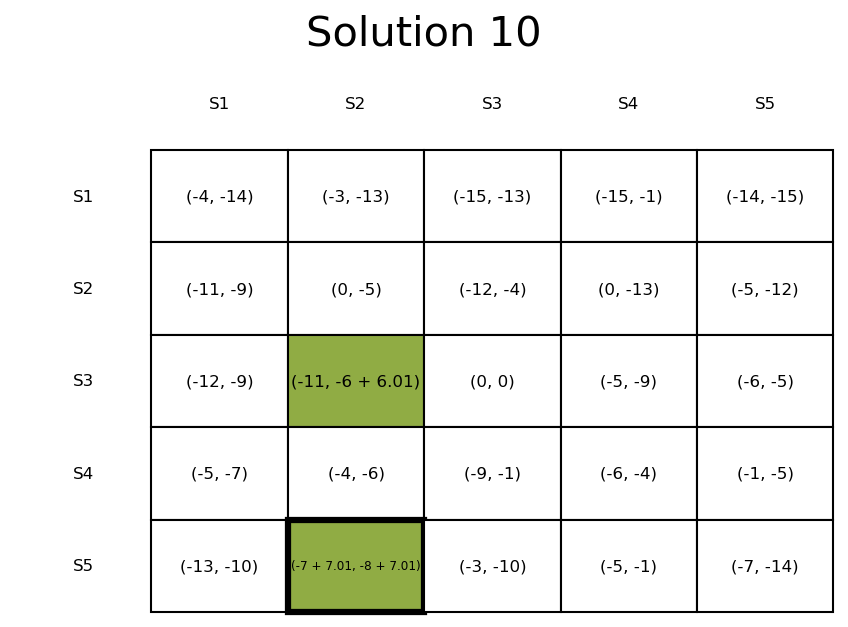




---- Finding Solution 11 ----



Changed cells for solution 11:
Cell: (('player1', 'S4'), ('player2', 'S3')) | Player: player1 | Sign: plus | Value: 9.009999999997673
Cell: (('player1', 'S5'), ('player2', 'S2')) | Player: player1 | Sign: plus | Value: 7.009999999999955
Cell: (('player1', 'S5'), ('player2', 'S4')) | Player: player2 | Sign: minus | Value: 7.009999999999927

The desired cell(s) [(('player1', 'S5'), ('player2', 'S2'))] are Nash Equilibria



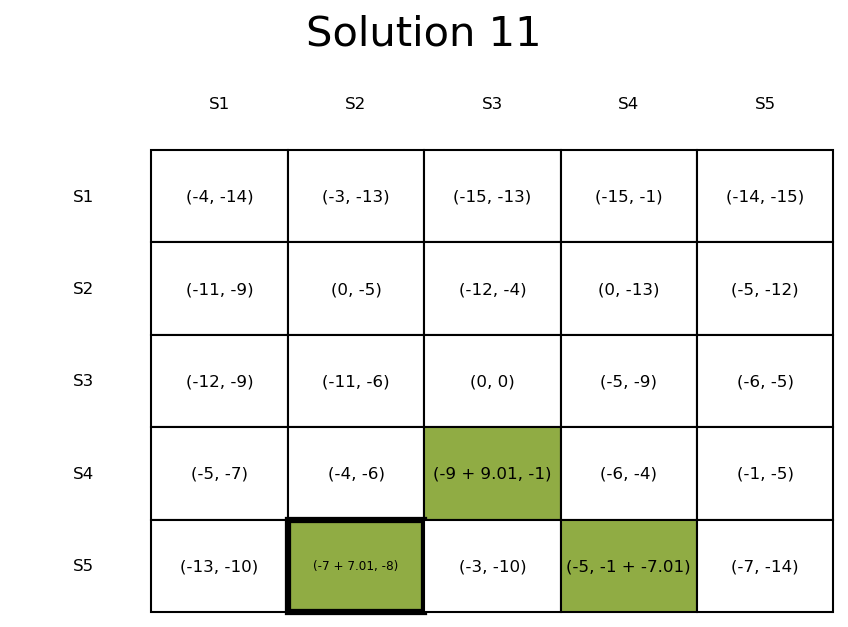




---- Finding Solution 12 ----



Changed cells for solution 12:
Cell: (('player1', 'S4'), ('player2', 'S3')) | Player: player1 | Sign: plus | Value: 9.009999999997735
Cell: (('player1', 'S5'), ('player2', 'S2')) | Player: player1 | Sign: plus | Value: 7.0099999999999625
Cell: (('player1', 'S5'), ('player2', 'S2')) | Player: player2 | Sign: plus | Value: 7.009999999999934

The desired cell(s) [(('player1', 'S5'), ('player2', 'S2'))] are Nash Equilibria



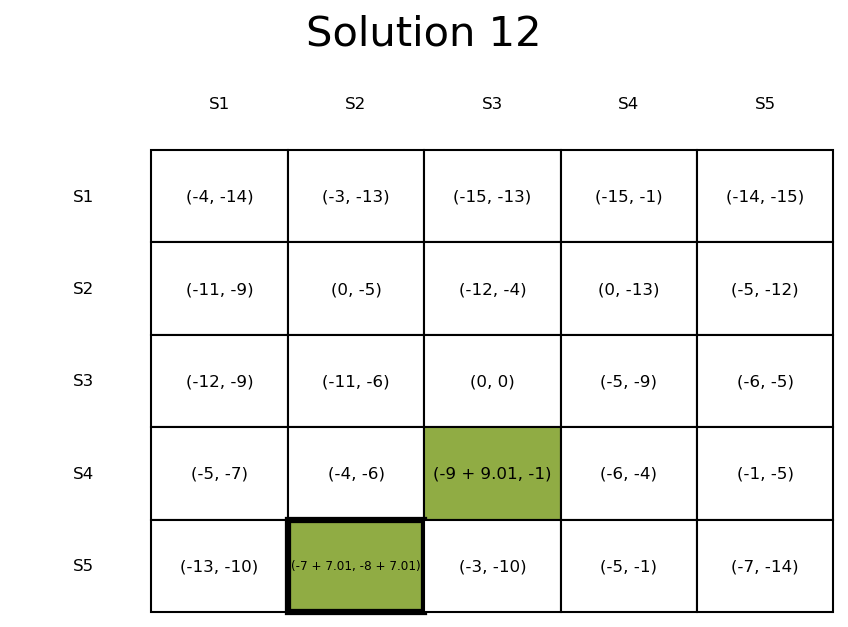




---- Finding Solution 13 ----



Changed cells for solution 13:
Cell: (('player1', 'S3'), ('player2', 'S1')) | Player: player2 | Sign: plus | Value: 9.009999999999081
Cell: (('player1', 'S5'), ('player2', 'S2')) | Player: player1 | Sign: plus | Value: 7.01
Cell: (('player1', 'S5'), ('player2', 'S4')) | Player: player2 | Sign: minus | Value: 7.01

The desired cell(s) [(('player1', 'S5'), ('player2', 'S2'))] are Nash Equilibria



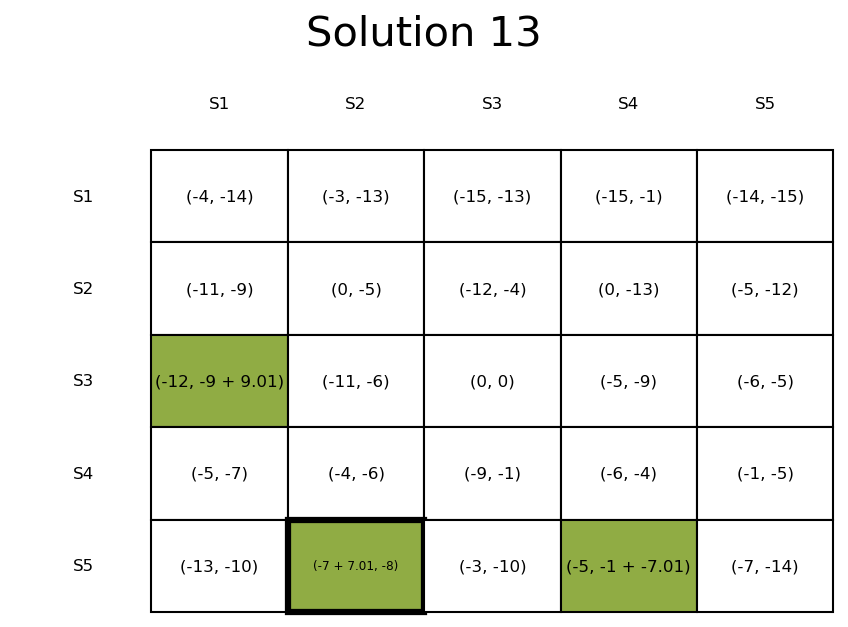




---- Finding Solution 14 ----



Changed cells for solution 14:
Cell: (('player1', 'S3'), ('player2', 'S4')) | Player: player2 | Sign: plus | Value: 9.009999999999081
Cell: (('player1', 'S5'), ('player2', 'S2')) | Player: player1 | Sign: plus | Value: 7.01
Cell: (('player1', 'S5'), ('player2', 'S4')) | Player: player2 | Sign: minus | Value: 7.01

The desired cell(s) [(('player1', 'S5'), ('player2', 'S2'))] are Nash Equilibria



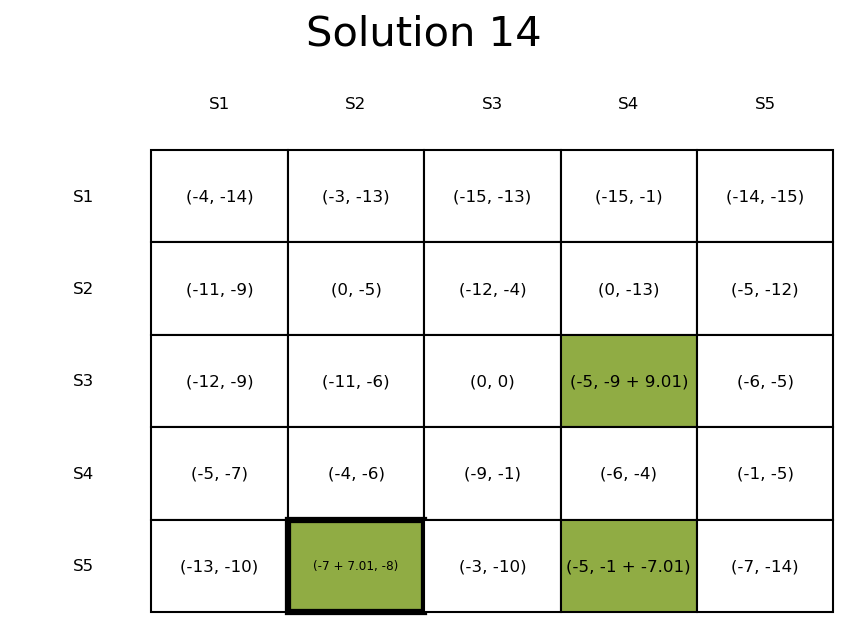




---- Finding Solution 15 ----



Changed cells for solution 15:
Cell: (('player1', 'S3'), ('player2', 'S1')) | Player: player2 | Sign: plus | Value: 9.009999999999081
Cell: (('player1', 'S5'), ('player2', 'S2')) | Player: player1 | Sign: plus | Value: 7.01
Cell: (('player1', 'S5'), ('player2', 'S2')) | Player: player2 | Sign: plus | Value: 7.01

The desired cell(s) [(('player1', 'S5'), ('player2', 'S2'))] are Nash Equilibria



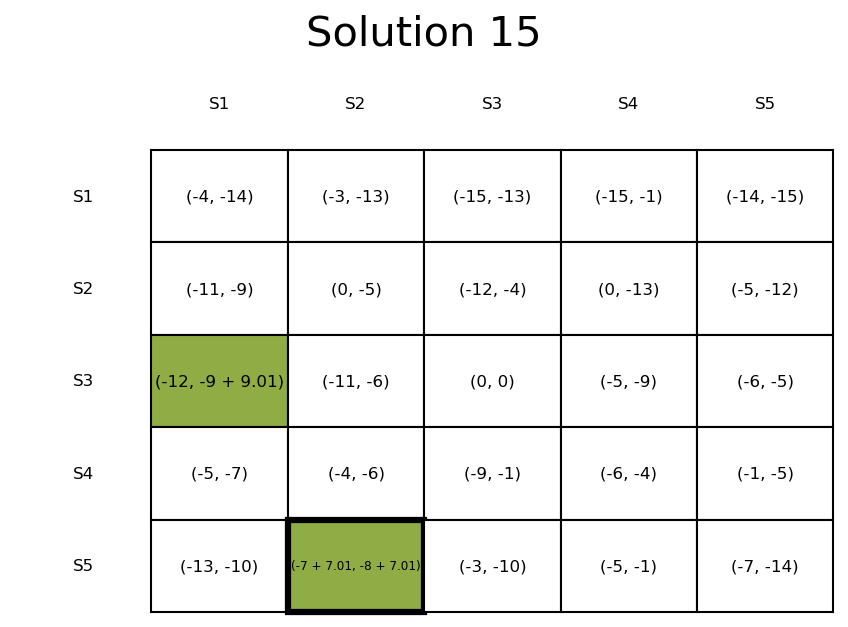




---- Finding Solution 16 ----



Changed cells for solution 16:
Cell: (('player1', 'S3'), ('player2', 'S4')) | Player: player2 | Sign: plus | Value: 9.009999999999081
Cell: (('player1', 'S5'), ('player2', 'S2')) | Player: player1 | Sign: plus | Value: 7.01
Cell: (('player1', 'S5'), ('player2', 'S2')) | Player: player2 | Sign: plus | Value: 7.01

The desired cell(s) [(('player1', 'S5'), ('player2', 'S2'))] are Nash Equilibria



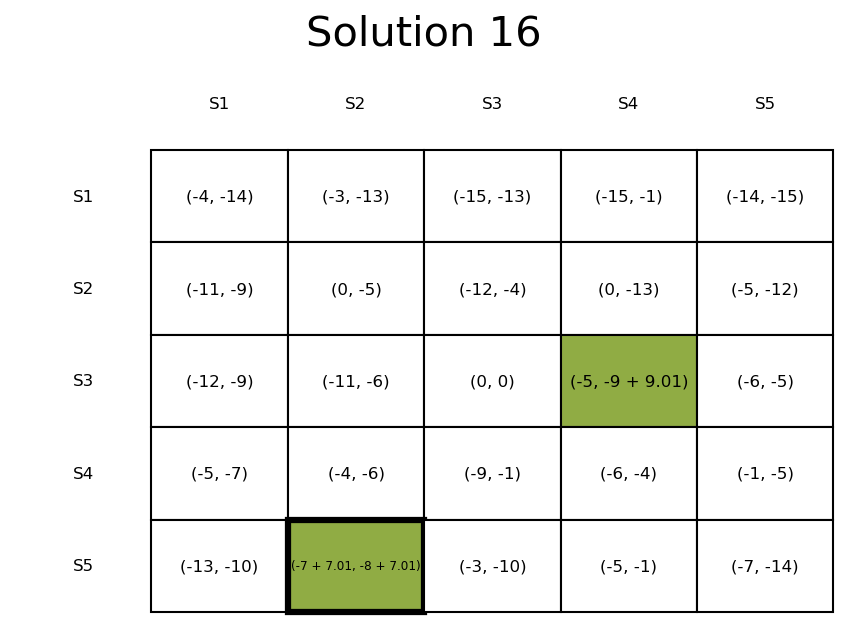




---- Finding Solution 17 ----



Changed cells for solution 17:
Cell: (('player1', 'S1'), ('player2', 'S2')) | Player: player1 | Sign: minus | Value: 4.009999990463257
Cell: (('player1', 'S2'), ('player2', 'S2')) | Player: player1 | Sign: minus | Value: 7.01
Cell: (('player1', 'S4'), ('player2', 'S2')) | Player: player1 | Sign: minus | Value: 3.009999990463257
Cell: (('player1', 'S5'), ('player2', 'S3')) | Player: player1 | Sign: plus | Value: 3.009999999999991
Cell: (('player1', 'S5'), ('player2', 'S4')) | Player: player2 | Sign: minus | Value: 7.01

The desired cell(s) [(('player1', 'S5'), ('player2', 'S2'))] are Nash Equilibria



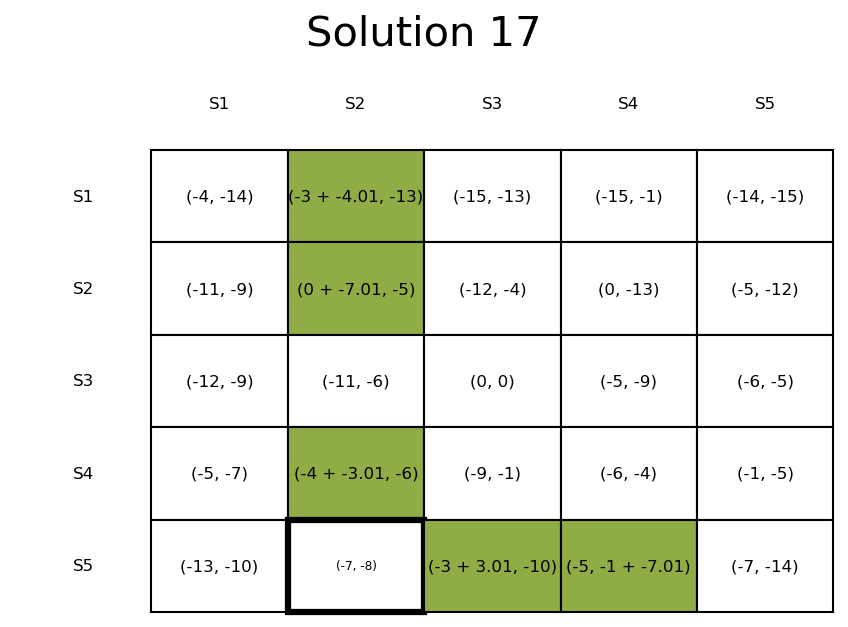




---- Finding Solution 18 ----



Changed cells for solution 18:
Cell: (('player1', 'S1'), ('player2', 'S2')) | Player: player1 | Sign: minus | Value: 4.009999999999906
Cell: (('player1', 'S2'), ('player2', 'S2')) | Player: player1 | Sign: minus | Value: 7.01
Cell: (('player1', 'S4'), ('player2', 'S2')) | Player: player1 | Sign: minus | Value: 3.0099999999999127
Cell: (('player1', 'S5'), ('player2', 'S2')) | Player: player2 | Sign: plus | Value: 7.009999999999927
Cell: (('player1', 'S5'), ('player2', 'S3')) | Player: player1 | Sign: plus | Value: 3.009999999996488

The desired cell(s) [(('player1', 'S5'), ('player2', 'S2'))] are Nash Equilibria



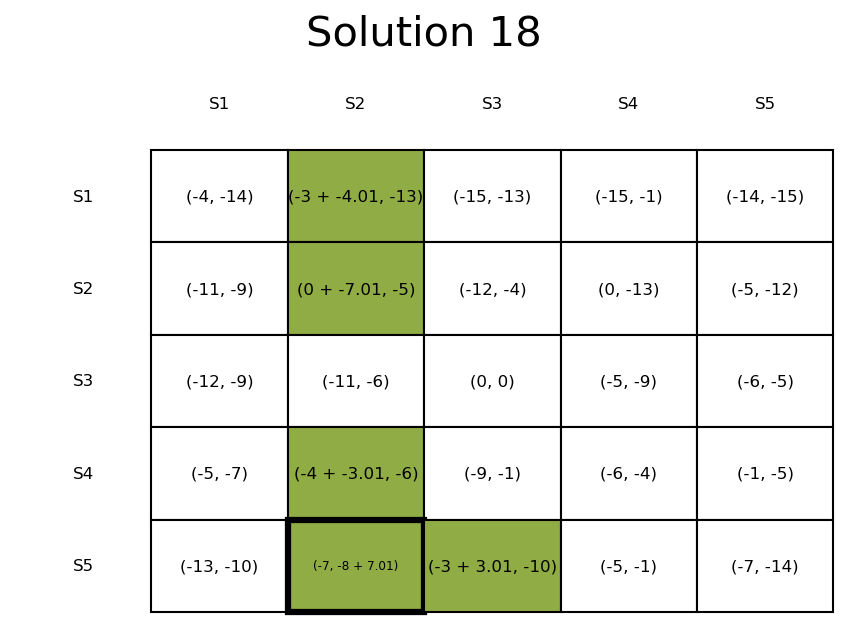




---- Finding Solution 19 ----



Changed cells for solution 19:
Cell: (('player1', 'S2'), ('player2', 'S2')) | Player: player1 | Sign: minus | Value: 3.0
Cell: (('player1', 'S2'), ('player2', 'S3')) | Player: player1 | Sign: plus | Value: 12.009999999998197
Cell: (('player1', 'S5'), ('player2', 'S2')) | Player: player1 | Sign: plus | Value: 4.01
Cell: (('player1', 'S5'), ('player2', 'S4')) | Player: player2 | Sign: minus | Value: 7.009999999999955

The desired cell(s) [(('player1', 'S5'), ('player2', 'S2'))] are Nash Equilibria



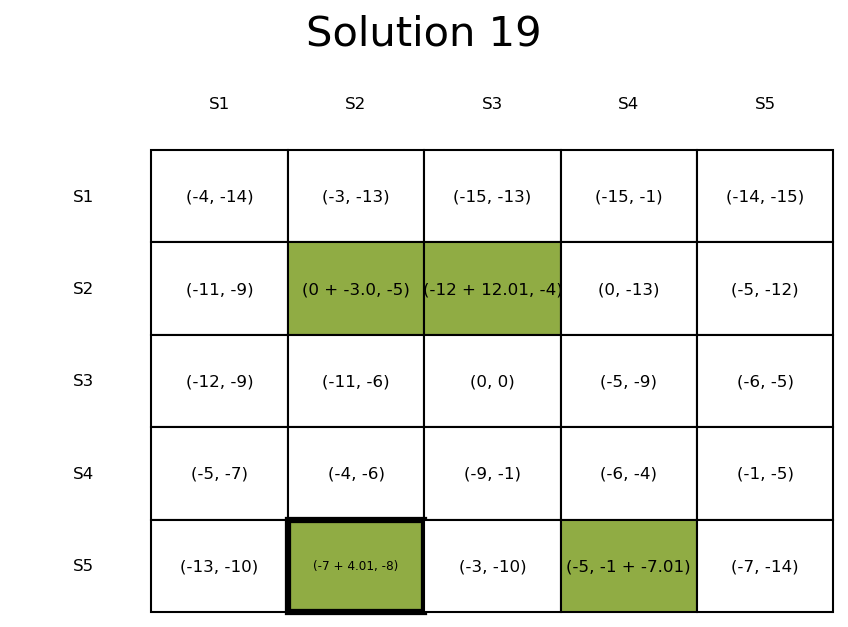




---- Finding Solution 20 ----



Changed cells for solution 20:
Cell: (('player1', 'S2'), ('player2', 'S3')) | Player: player1 | Sign: plus | Value: 12.009999999999081
Cell: (('player1', 'S5'), ('player2', 'S2')) | Player: player1 | Sign: plus | Value: 7.01
Cell: (('player1', 'S5'), ('player2', 'S4')) | Player: player2 | Sign: minus | Value: 7.01

The desired cell(s) [(('player1', 'S5'), ('player2', 'S2'))] are Nash Equilibria



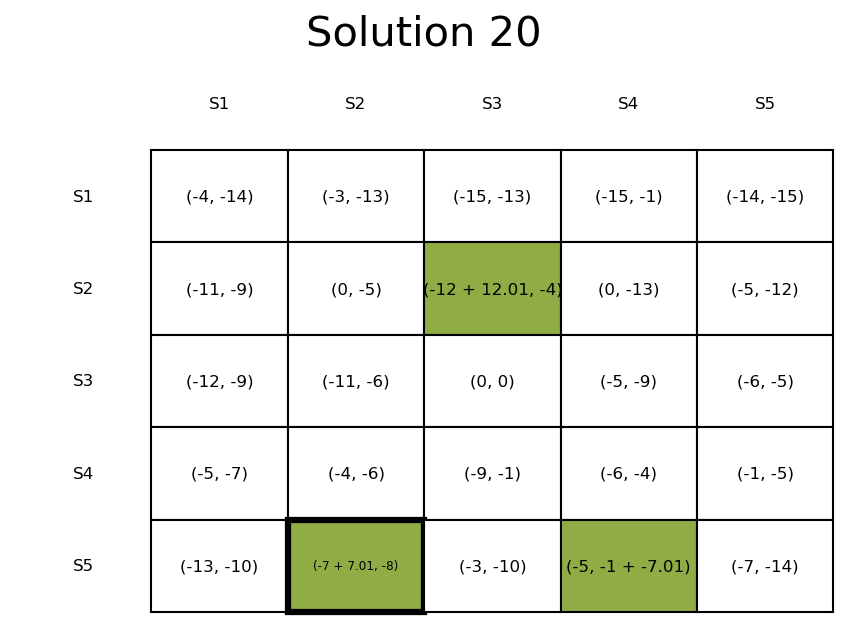




---- Finding Solution 21 ----



Changed cells for solution 21:
Cell: (('player1', 'S2'), ('player2', 'S2')) | Player: player1 | Sign: minus | Value: 3.0
Cell: (('player1', 'S2'), ('player2', 'S3')) | Player: player1 | Sign: plus | Value: 12.009999999999081
Cell: (('player1', 'S5'), ('player2', 'S2')) | Player: player1 | Sign: plus | Value: 4.01
Cell: (('player1', 'S5'), ('player2', 'S2')) | Player: player2 | Sign: plus | Value: 7.01

The desired cell(s) [(('player1', 'S5'), ('player2', 'S2'))] are Nash Equilibria



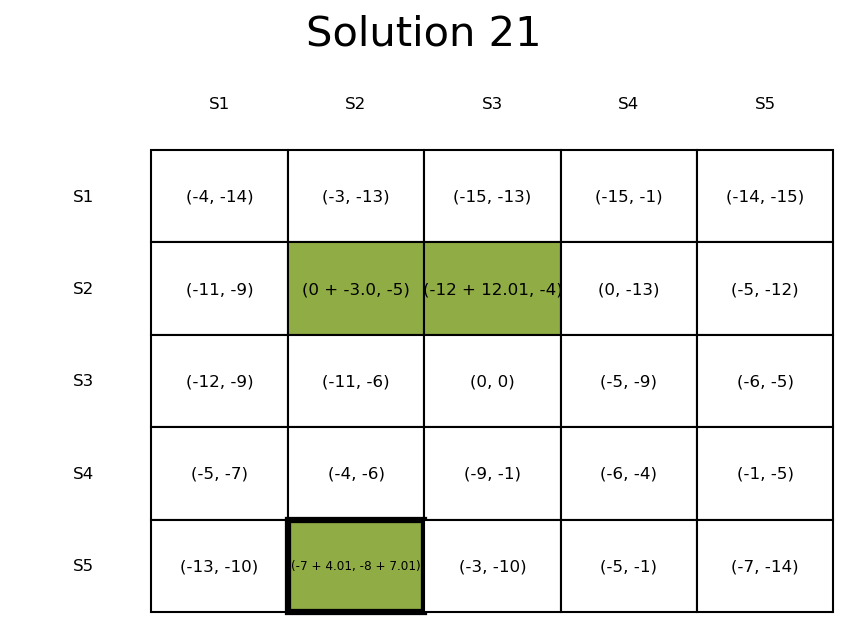




---- Finding Solution 22 ----



Changed cells for solution 22:
Cell: (('player1', 'S2'), ('player2', 'S3')) | Player: player1 | Sign: plus | Value: 12.00999999999706
Cell: (('player1', 'S5'), ('player2', 'S2')) | Player: player1 | Sign: plus | Value: 7.009999999999955
Cell: (('player1', 'S5'), ('player2', 'S2')) | Player: player2 | Sign: plus | Value: 7.009999999999927

The desired cell(s) [(('player1', 'S5'), ('player2', 'S2'))] are Nash Equilibria



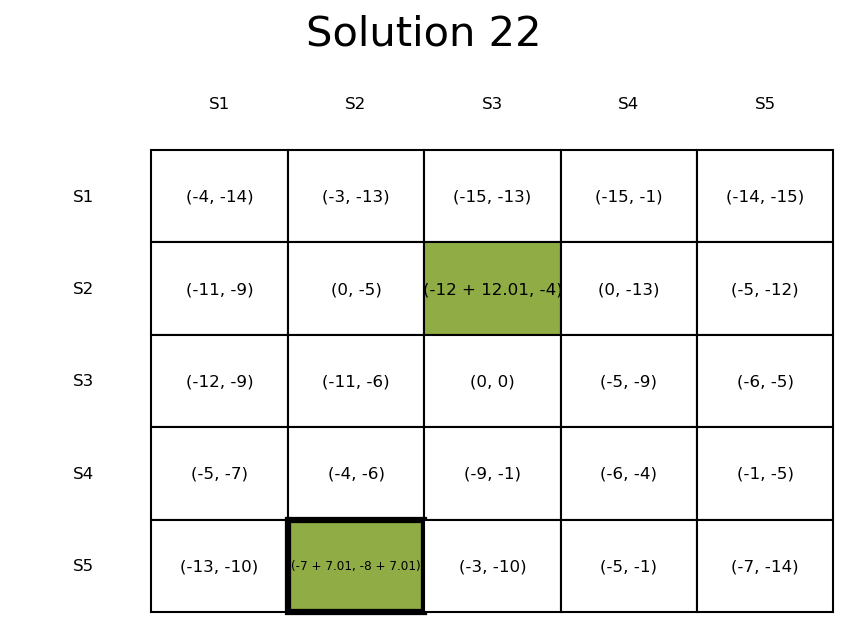




---- Finding Solution 23 ----



Changed cells for solution 23:
Cell: (('player1', 'S1'), ('player2', 'S2')) | Player: player1 | Sign: minus | Value: 4.0099999999983496
Cell: (('player1', 'S2'), ('player2', 'S2')) | Player: player1 | Sign: minus | Value: 7.0099999999983496
Cell: (('player1', 'S3'), ('player2', 'S5')) | Player: player2 | Sign: plus | Value: 5.0099999999975395
Cell: (('player1', 'S4'), ('player2', 'S2')) | Player: player1 | Sign: minus | Value: 3.0099999999983424
Cell: (('player1', 'S5'), ('player2', 'S2')) | Player: player2 | Sign: plus | Value: 7.009999999998371

The desired cell(s) [(('player1', 'S5'), ('player2', 'S2'))] are Nash Equilibria



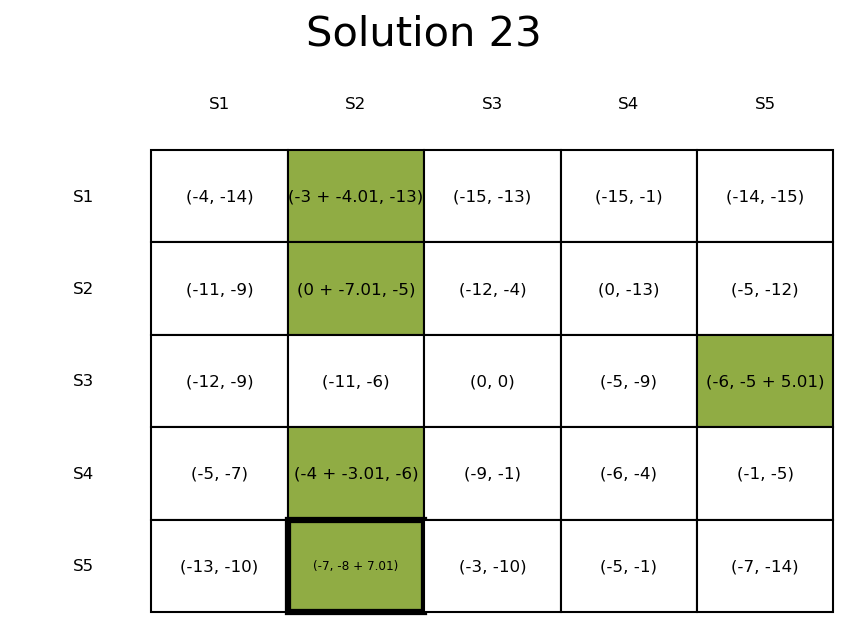




---- Finding Solution 24 ----



Changed cells for solution 24:
Cell: (('player1', 'S1'), ('player2', 'S2')) | Player: player1 | Sign: minus | Value: 4.009999999999977
Cell: (('player1', 'S2'), ('player2', 'S2')) | Player: player1 | Sign: minus | Value: 7.01
Cell: (('player1', 'S3'), ('player2', 'S5')) | Player: player2 | Sign: plus | Value: 5.009999999996623
Cell: (('player1', 'S4'), ('player2', 'S2')) | Player: player1 | Sign: minus | Value: 3.0099999999999447
Cell: (('player1', 'S5'), ('player2', 'S4')) | Player: player2 | Sign: minus | Value: 7.01

The desired cell(s) [(('player1', 'S5'), ('player2', 'S2'))] are Nash Equilibria



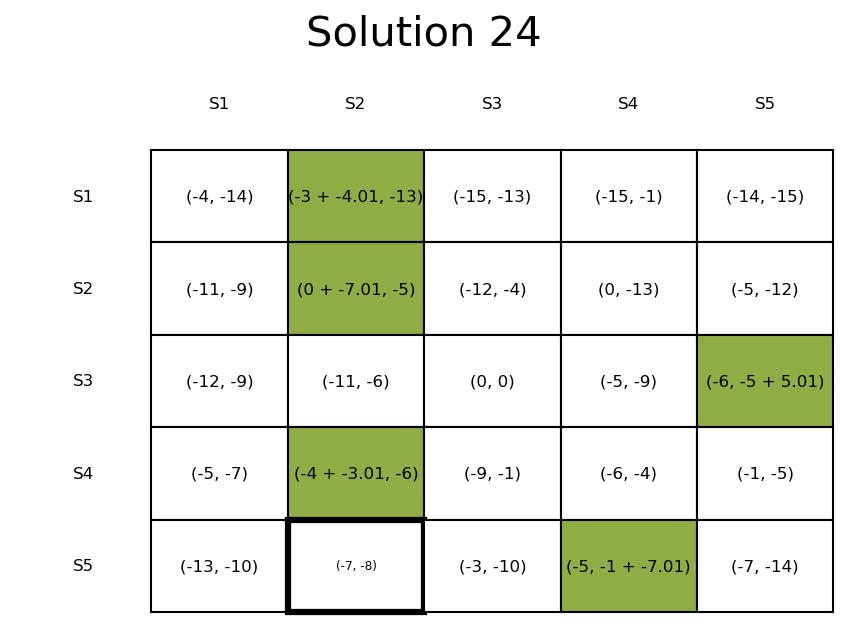




---- Finding Solution 25 ----



Changed cells for solution 25:
Cell: (('player1', 'S1'), ('player2', 'S2')) | Player: player1 | Sign: minus | Value: 4.01
Cell: (('player1', 'S2'), ('player2', 'S2')) | Player: player1 | Sign: minus | Value: 7.01
Cell: (('player1', 'S3'), ('player2', 'S2')) | Player: player2 | Sign: plus | Value: 6.009999999998627
Cell: (('player1', 'S4'), ('player2', 'S2')) | Player: player1 | Sign: minus | Value: 3.01
Cell: (('player1', 'S5'), ('player2', 'S4')) | Player: player2 | Sign: minus | Value: 7.01

The desired cell(s) [(('player1', 'S5'), ('player2', 'S2'))] are Nash Equilibria



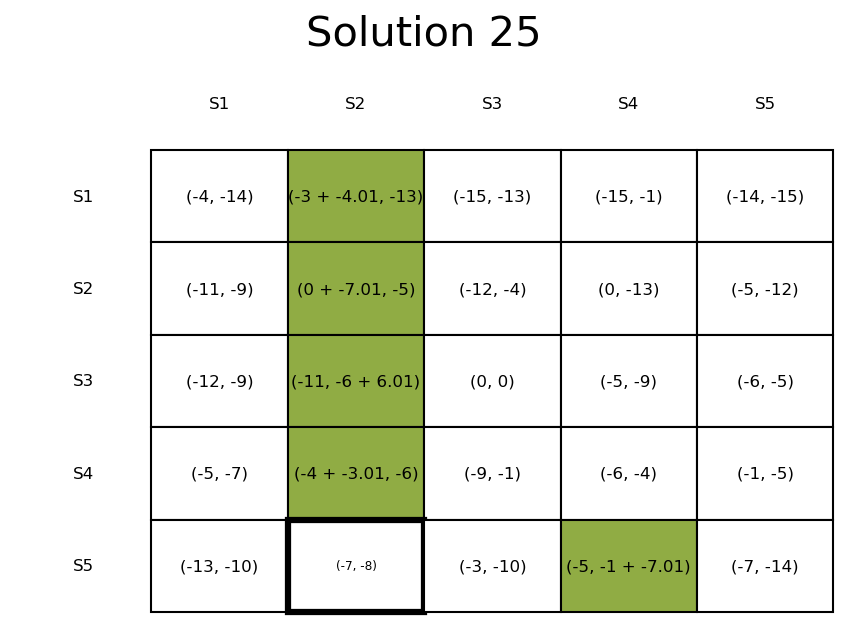




---- Finding Solution 26 ----



Changed cells for solution 26:
Cell: (('player1', 'S1'), ('player2', 'S2')) | Player: player1 | Sign: minus | Value: 4.009999999998385
Cell: (('player1', 'S2'), ('player2', 'S2')) | Player: player1 | Sign: minus | Value: 7.01
Cell: (('player1', 'S3'), ('player2', 'S2')) | Player: player2 | Sign: plus | Value: 6.009999999996605
Cell: (('player1', 'S4'), ('player2', 'S2')) | Player: player1 | Sign: minus | Value: 3.009999999998385
Cell: (('player1', 'S5'), ('player2', 'S2')) | Player: player2 | Sign: plus | Value: 7.009999999998392

The desired cell(s) [(('player1', 'S5'), ('player2', 'S2'))] are Nash Equilibria



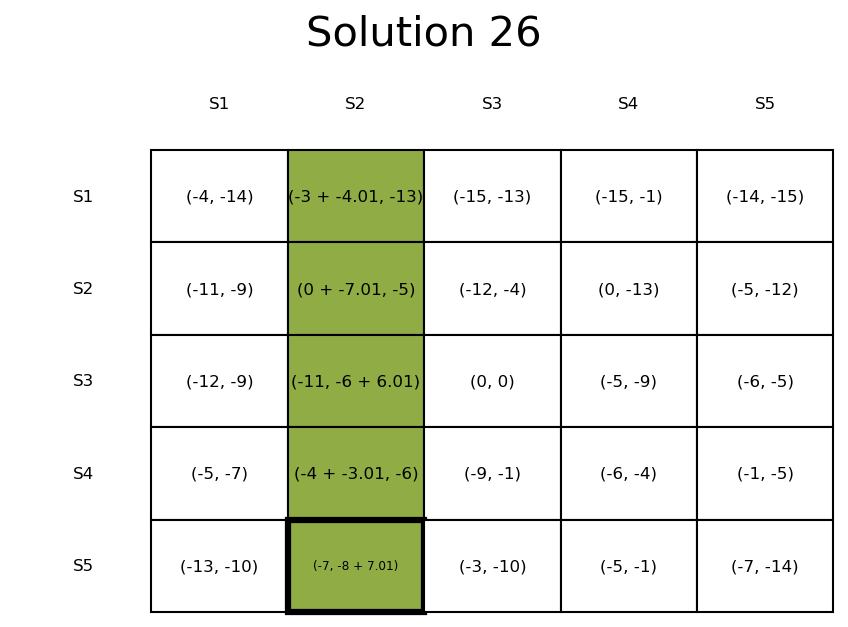




---- Finding Solution 27 ----



Changed cells for solution 27:
Cell: (('player1', 'S1'), ('player2', 'S3')) | Player: player1 | Sign: plus | Value: 15.009999999999081
Cell: (('player1', 'S5'), ('player2', 'S2')) | Player: player1 | Sign: plus | Value: 7.01
Cell: (('player1', 'S5'), ('player2', 'S4')) | Player: player2 | Sign: minus | Value: 7.01

The desired cell(s) [(('player1', 'S5'), ('player2', 'S2'))] are Nash Equilibria



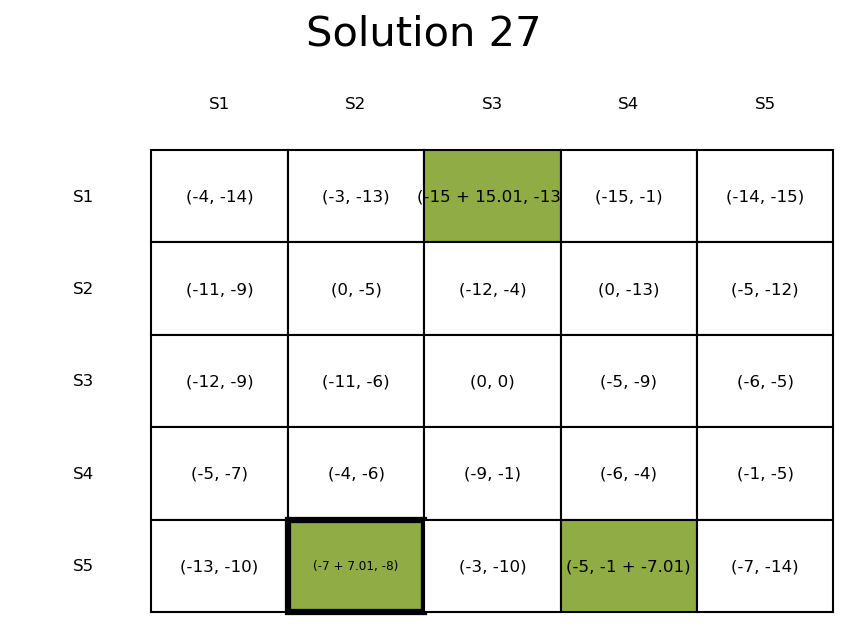




---- Finding Solution 28 ----



Changed cells for solution 28:
Cell: (('player1', 'S1'), ('player2', 'S3')) | Player: player1 | Sign: plus | Value: 15.009999999996541
Cell: (('player1', 'S5'), ('player2', 'S2')) | Player: player1 | Sign: plus | Value: 7.01
Cell: (('player1', 'S5'), ('player2', 'S2')) | Player: player2 | Sign: plus | Value: 7.009999999999955

The desired cell(s) [(('player1', 'S5'), ('player2', 'S2'))] are Nash Equilibria



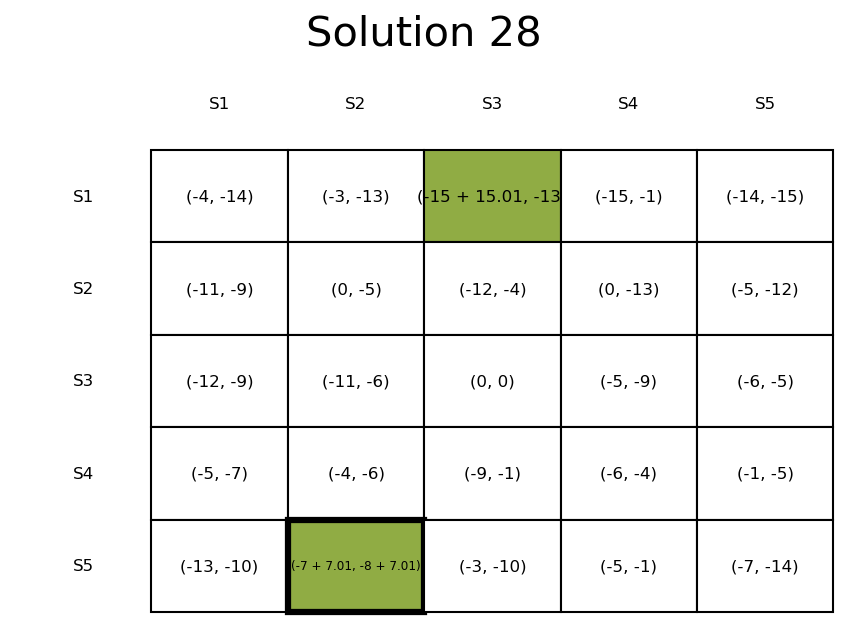




---- Finding Solution 29 ----



Changed cells for solution 29:
Cell: (('player1', 'S1'), ('player2', 'S2')) | Player: player1 | Sign: minus | Value: 4.01
Cell: (('player1', 'S2'), ('player2', 'S2')) | Player: player1 | Sign: minus | Value: 7.01
Cell: (('player1', 'S3'), ('player2', 'S4')) | Player: player2 | Sign: plus | Value: 9.009999999998627
Cell: (('player1', 'S4'), ('player2', 'S2')) | Player: player1 | Sign: minus | Value: 3.01
Cell: (('player1', 'S5'), ('player2', 'S4')) | Player: player2 | Sign: minus | Value: 7.01

The desired cell(s) [(('player1', 'S5'), ('player2', 'S2'))] are Nash Equilibria



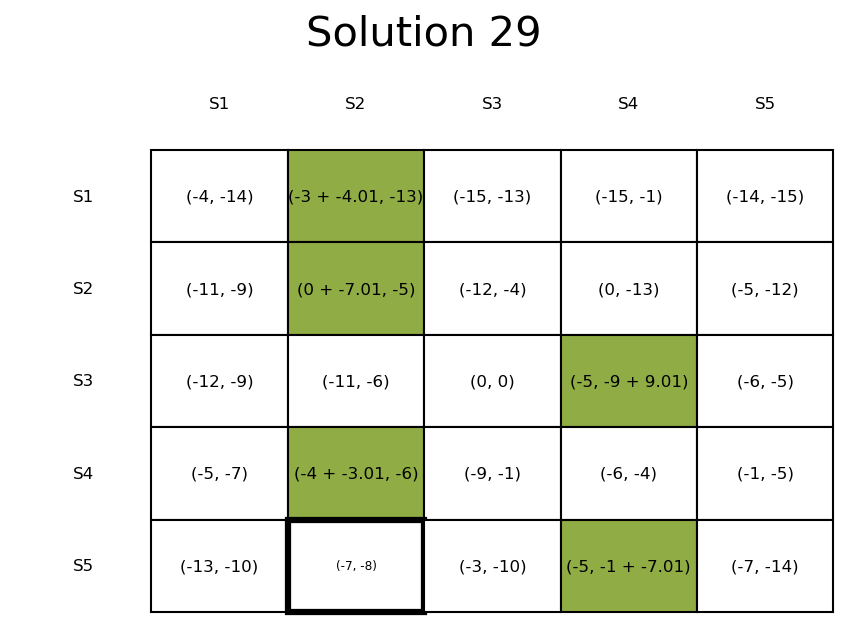




---- Finding Solution 30 ----



Changed cells for solution 30:
Cell: (('player1', 'S1'), ('player2', 'S2')) | Player: player1 | Sign: minus | Value: 4.00999999999992
Cell: (('player1', 'S2'), ('player2', 'S2')) | Player: player1 | Sign: minus | Value: 7.01
Cell: (('player1', 'S3'), ('player2', 'S4')) | Player: player2 | Sign: plus | Value: 9.009999999997468
Cell: (('player1', 'S4'), ('player2', 'S2')) | Player: player1 | Sign: minus | Value: 3.00999999999992
Cell: (('player1', 'S5'), ('player2', 'S2')) | Player: player2 | Sign: plus | Value: 7.009999999999849

The desired cell(s) [(('player1', 'S5'), ('player2', 'S2'))] are Nash Equilibria



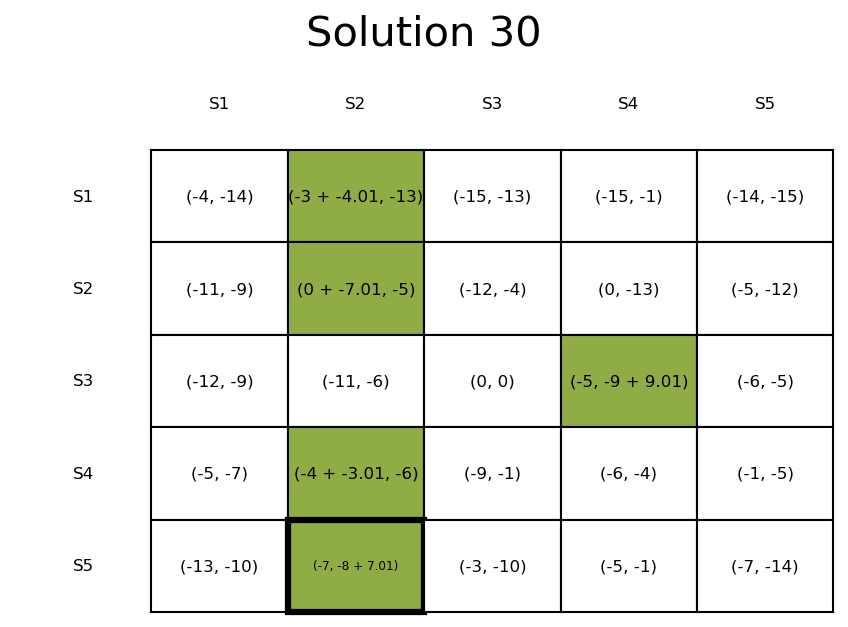




---- Finding Solution 31 ----



Changed cells for solution 31:
Cell: (('player1', 'S1'), ('player2', 'S2')) | Player: player1 | Sign: minus | Value: 4.0099999999983496
Cell: (('player1', 'S2'), ('player2', 'S2')) | Player: player1 | Sign: minus | Value: 7.009999999998286
Cell: (('player1', 'S3'), ('player2', 'S1')) | Player: player2 | Sign: plus | Value: 9.009999999997468
Cell: (('player1', 'S4'), ('player2', 'S2')) | Player: player1 | Sign: minus | Value: 3.0099999999983496
Cell: (('player1', 'S5'), ('player2', 'S4')) | Player: player2 | Sign: minus | Value: 7.01

The desired cell(s) [(('player1', 'S5'), ('player2', 'S2'))] are Nash Equilibria



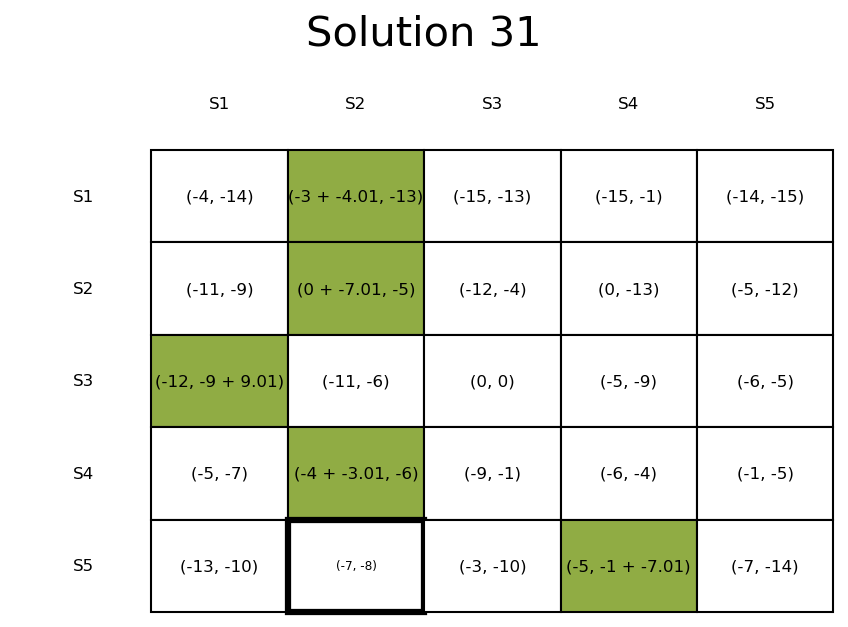




---- Finding Solution 32 ----



Changed cells for solution 32:
Cell: (('player1', 'S1'), ('player2', 'S2')) | Player: player1 | Sign: minus | Value: 4.0099999999983496
Cell: (('player1', 'S2'), ('player2', 'S2')) | Player: player1 | Sign: minus | Value: 7.009999999999991
Cell: (('player1', 'S3'), ('player2', 'S1')) | Player: player2 | Sign: plus | Value: 9.009999999997468
Cell: (('player1', 'S4'), ('player2', 'S2')) | Player: player1 | Sign: minus | Value: 3.0099999999983496
Cell: (('player1', 'S5'), ('player2', 'S2')) | Player: player2 | Sign: plus | Value: 7.0099999999983496

The desired cell(s) [(('player1', 'S5'), ('player2', 'S2'))] are Nash Equilibria



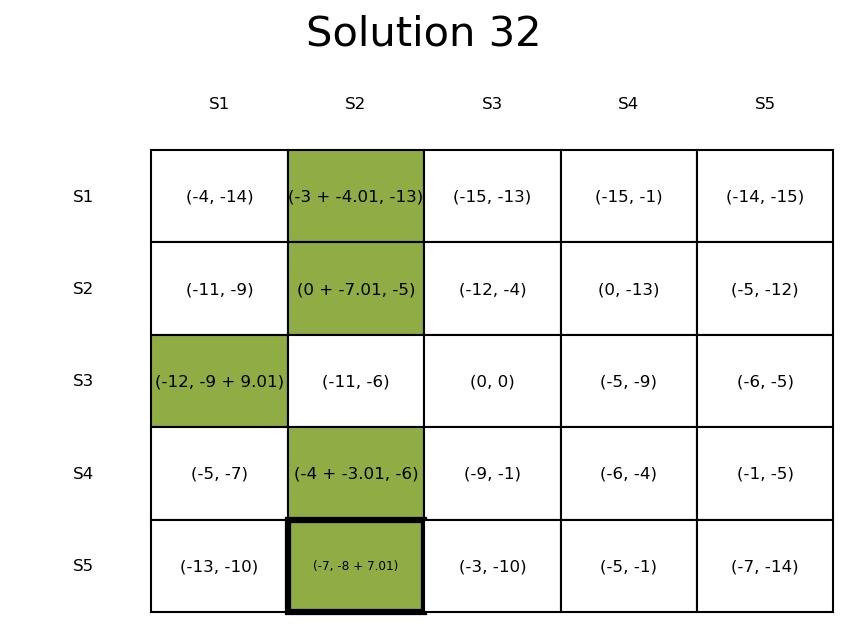




---- Finding Solution 33 ----



Changed cells for solution 33:
Cell: (('player1', 'S1'), ('player2', 'S2')) | Player: player1 | Sign: minus | Value: 4.009999999999977
Cell: (('player1', 'S2'), ('player2', 'S2')) | Player: player1 | Sign: minus | Value: 7.01
Cell: (('player1', 'S4'), ('player2', 'S2')) | Player: player1 | Sign: minus | Value: 3.0099999999999767
Cell: (('player1', 'S4'), ('player2', 'S3')) | Player: player1 | Sign: plus | Value: 9.009999999998632
Cell: (('player1', 'S5'), ('player2', 'S4')) | Player: player2 | Sign: minus | Value: 7.01

The desired cell(s) [(('player1', 'S5'), ('player2', 'S2'))] are Nash Equilibria



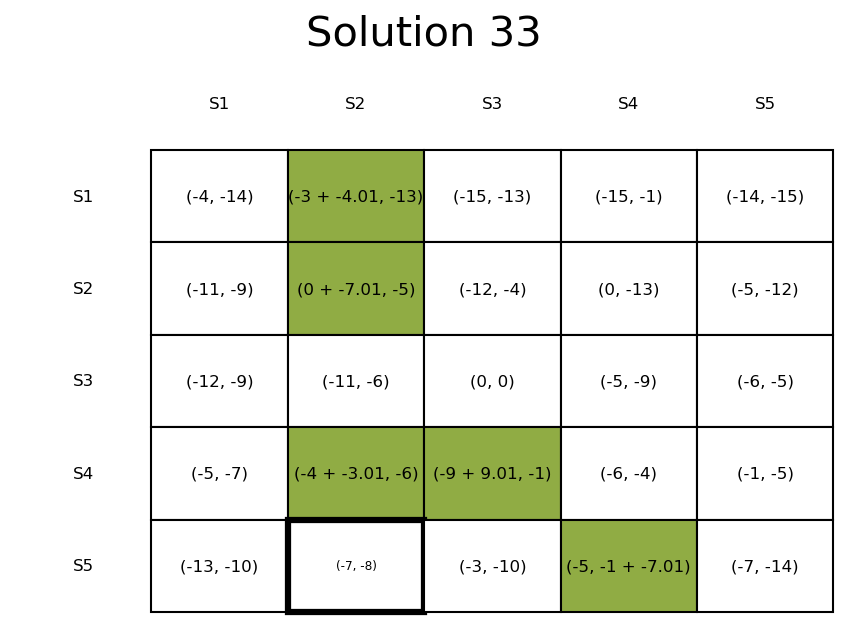




---- Finding Solution 34 ----



Changed cells for solution 34:
Cell: (('player1', 'S1'), ('player2', 'S2')) | Player: player1 | Sign: minus | Value: 4.009999999999948
Cell: (('player1', 'S2'), ('player2', 'S2')) | Player: player1 | Sign: minus | Value: 7.01
Cell: (('player1', 'S4'), ('player2', 'S2')) | Player: player1 | Sign: minus | Value: 3.0099999999999625
Cell: (('player1', 'S4'), ('player2', 'S3')) | Player: player1 | Sign: plus | Value: 9.009999999998191
Cell: (('player1', 'S5'), ('player2', 'S2')) | Player: player2 | Sign: plus | Value: 7.0099999999998985

The desired cell(s) [(('player1', 'S5'), ('player2', 'S2'))] are Nash Equilibria



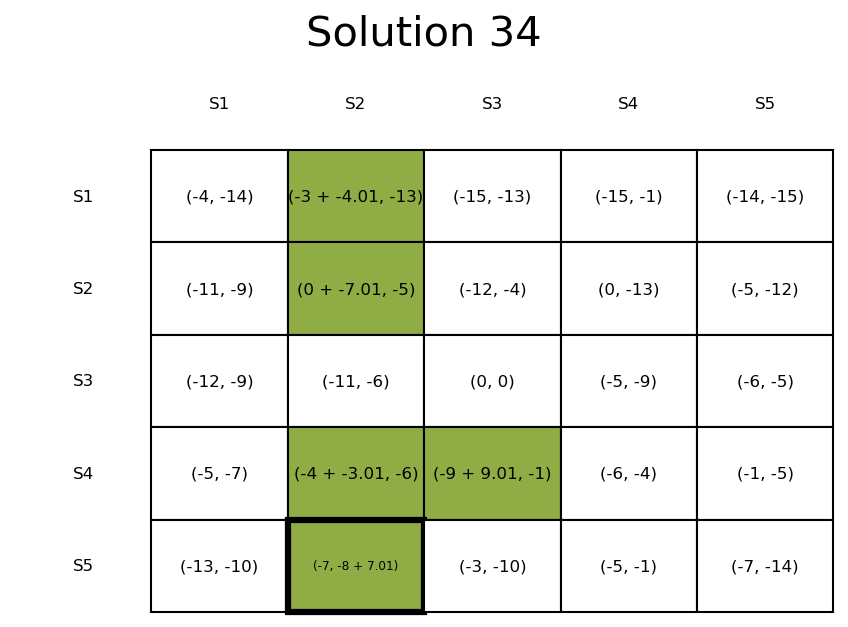




---- Finding Solution 35 ----



Changed cells for solution 35:
Cell: (('player1', 'S1'), ('player2', 'S2')) | Player: player1 | Sign: minus | Value: 4.01
Cell: (('player1', 'S2'), ('player2', 'S2')) | Player: player1 | Sign: minus | Value: 7.01
Cell: (('player1', 'S2'), ('player2', 'S3')) | Player: player1 | Sign: plus | Value: 12.009999999996175
Cell: (('player1', 'S4'), ('player2', 'S2')) | Player: player1 | Sign: minus | Value: 3.01
Cell: (('player1', 'S5'), ('player2', 'S2')) | Player: player2 | Sign: plus | Value: 7.01

The desired cell(s) [(('player1', 'S5'), ('player2', 'S2'))] are Nash Equilibria



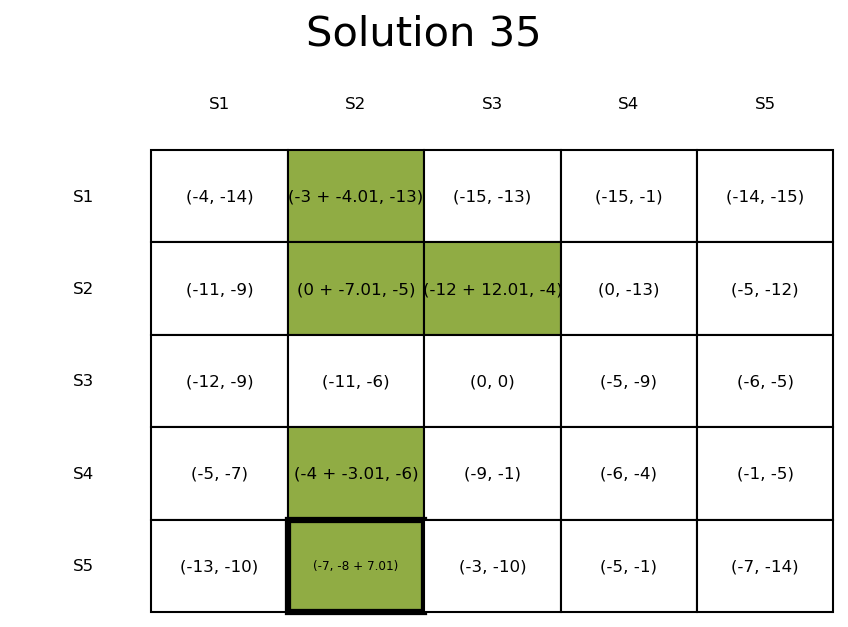




---- Finding Solution 36 ----



Changed cells for solution 36:
Cell: (('player1', 'S1'), ('player2', 'S2')) | Player: player1 | Sign: minus | Value: 4.01
Cell: (('player1', 'S2'), ('player2', 'S2')) | Player: player1 | Sign: minus | Value: 7.01
Cell: (('player1', 'S2'), ('player2', 'S3')) | Player: player1 | Sign: plus | Value: 12.009999999995266
Cell: (('player1', 'S4'), ('player2', 'S2')) | Player: player1 | Sign: minus | Value: 3.01
Cell: (('player1', 'S5'), ('player2', 'S4')) | Player: player2 | Sign: minus | Value: 7.01

The desired cell(s) [(('player1', 'S5'), ('player2', 'S2'))] are Nash Equilibria



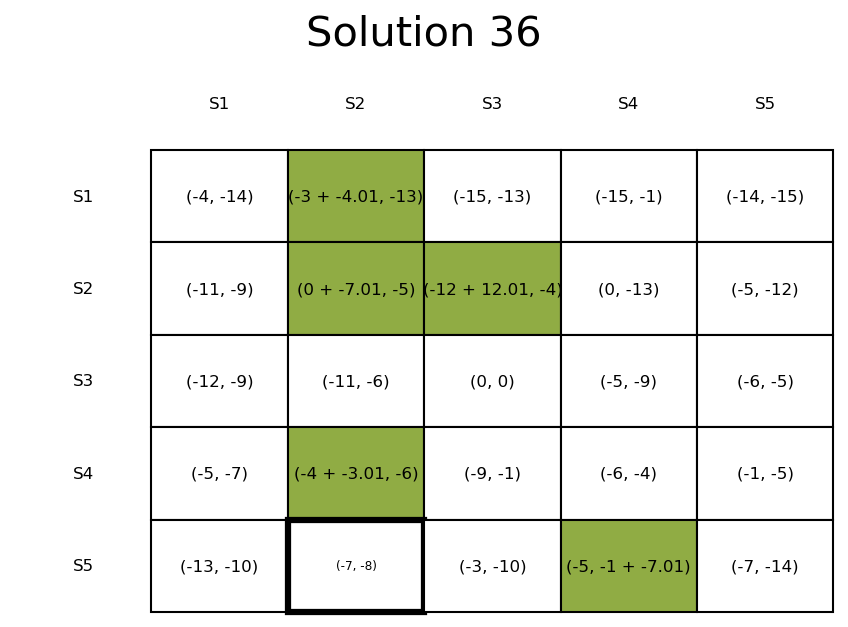




---- Finding Solution 37 ----



Changed cells for solution 37:
Cell: (('player1', 'S1'), ('player2', 'S2')) | Player: player1 | Sign: minus | Value: 4.01
Cell: (('player1', 'S1'), ('player2', 'S3')) | Player: player1 | Sign: plus | Value: 15.009999999997035
Cell: (('player1', 'S2'), ('player2', 'S2')) | Player: player1 | Sign: minus | Value: 7.01
Cell: (('player1', 'S4'), ('player2', 'S2')) | Player: player1 | Sign: minus | Value: 3.01
Cell: (('player1', 'S5'), ('player2', 'S2')) | Player: player2 | Sign: plus | Value: 7.01

The desired cell(s) [(('player1', 'S5'), ('player2', 'S2'))] are Nash Equilibria



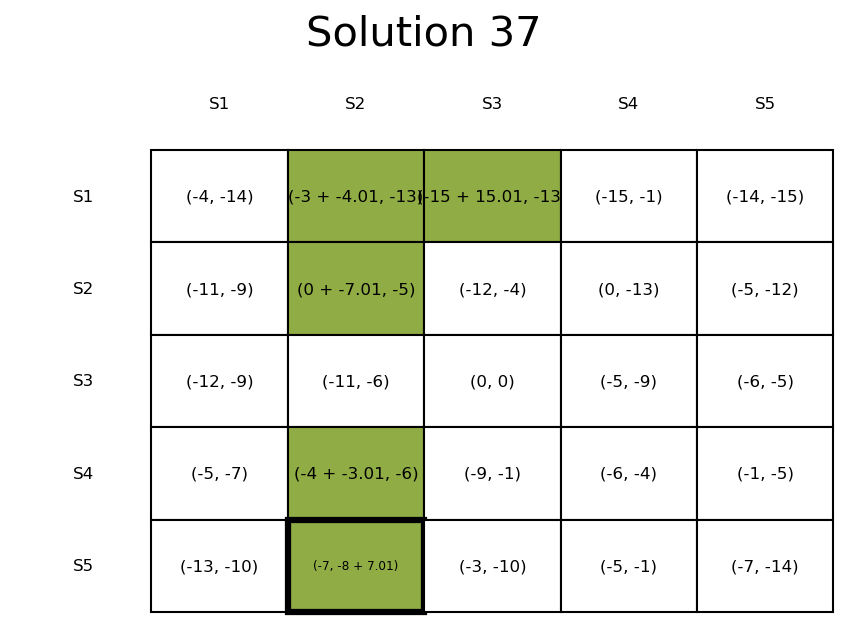




---- Finding Solution 38 ----



Changed cells for solution 38:
Cell: (('player1', 'S1'), ('player2', 'S2')) | Player: player1 | Sign: minus | Value: 4.01
Cell: (('player1', 'S1'), ('player2', 'S3')) | Player: player1 | Sign: plus | Value: 15.009999999996353
Cell: (('player1', 'S2'), ('player2', 'S2')) | Player: player1 | Sign: minus | Value: 7.01
Cell: (('player1', 'S4'), ('player2', 'S2')) | Player: player1 | Sign: minus | Value: 3.01
Cell: (('player1', 'S5'), ('player2', 'S4')) | Player: player2 | Sign: minus | Value: 7.01

The desired cell(s) [(('player1', 'S5'), ('player2', 'S2'))] are Nash Equilibria



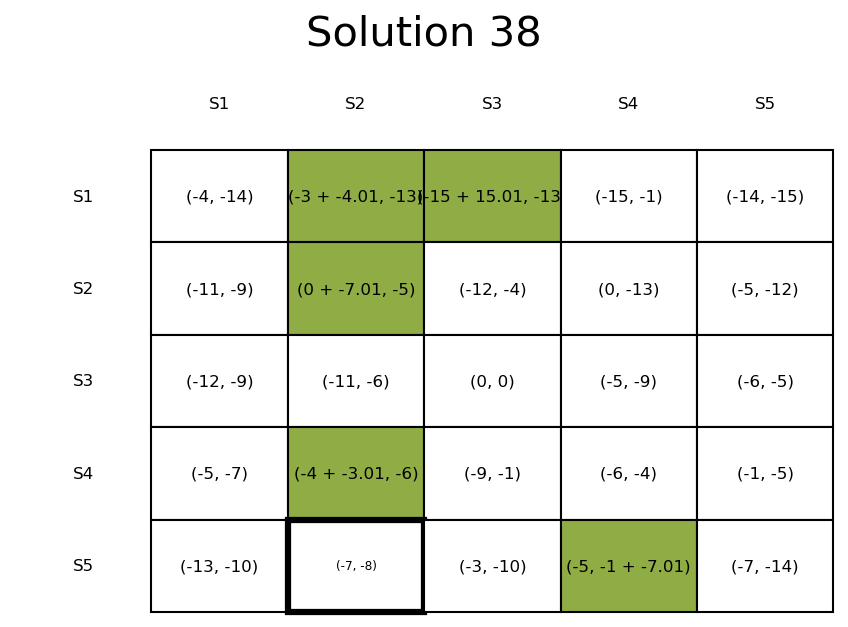




---- Finding Solution 39 ----



The model is infeasible


In [6]:
run_5_by_5()